## 1.1. Отрицательный и положительный классы, порог отсечения

## 1.2. Матрица ошибок

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
# из модуля sklearn.metrics импортируем
# функцию confusion_matrix()
from sklearn.metrics import confusion_matrix

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/results.csv', sep=';')
data.head(5)

,fact,predict,probability
0,1,1,0.556452
1,1,1,0.556452
2,0,1,0.556452
3,1,1,0.921147
4,1,1,0.921147


In [3]:
# вычисляем матрицу ошибок
confusion = confusion_matrix(data['fact'], 
                             data['predict'])
# печатаем матрицу ошибок
print("Матрица ошибок:\n{}".format(confusion))

Матрица ошибок:
[[464 282]
 [ 73 525]]


## 1.3. Доля правильных ответов, правильность (accuracy)

In [4]:
# из модуля sklearn.metrics импортируем 
# функцию accuracy_score()
from sklearn.metrics import accuracy_score
# вычисляем правильность
acc_score = accuracy_score(data['fact'], 
                           data['predict'])
# печатаем значение правильности
print("Правильность: {:.3f}".format(acc_score))

Правильность: 0.736


## 1.4. Чувствительность (sensitivity)

In [5]:
# вычисляем tn, fp, fn, tp
tn, fp, fn, tp = confusion_matrix(
    data['fact'], data['predict']).ravel()
# вычисляем чувствительность
sensitivity = tp / (tp + fn)
# печатаем значение чувствительности
print("Чувствительность: {:.3f}".format(sensitivity))

Чувствительность: 0.878


## 1.5. Специфичность (specificity)

In [6]:
# вычисляем специфичность
specificity = tn / (tn + fp)
# печатаем значение специфичности
print("Специфичность: {:.3f}".format(specificity))

Специфичность: 0.622


## 1.6. 1 – специфичность (1 – specificity)

In [7]:
# вычисляем 1 - специфичность
one_minus_specificity = fp / (fp + tn)
# печатаем значение 1 - специфичности
print("1 - специфичность: {:.3f}".format(
    one_minus_specificity))

1 - специфичность: 0.378


## 1.7. Сбалансированная правильность (balanced accuracy)

In [8]:
# из модуля sklearn.metrics импортируем 
# функцию balanced_accuracy_score()
from sklearn.metrics import balanced_accuracy_score
# вычисляем сбалансированную правильность
bal_acc = balanced_accuracy_score(data['fact'], 
                                  data['predict'])
# печатаем значение сбалансированной правильности
print("Сбалансированная правильность: {:.3f}".format(bal_acc))

Сбалансированная правильность: 0.750


## 1.8. Точность (Precision)

In [9]:
# вычисляем точность
precision = tp / (tp + fp)
# печатаем значение точности
print("Точность: {:.3f}".format(precision))

Точность: 0.651


## 1.9. Сравнение точности и чувствительности (полноты)

## 1.10. F-мера (F-score или F-measure)

In [10]:
# из модуля sklearn.metrics импортируем функцию f1_score()
from sklearn.metrics import f1_score
# вычисляем F1-меру
f1 = f1_score(data['fact'], data['predict'])
# печатаем F1-меру
print("F1-мера: {:.3f}".format(f1))

F1-мера: 0.747


In [11]:
# импортируем библиотеку matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# включаем режим 'retina', если у вас экран Retina
%config InlineBackend.figure_format = 'retina'
# импортируем конструктор Axes3D
from mpl_toolkits.mplot3d import Axes3D

In [12]:
# подготавливаем значения осей для построения 3D-поверхности:
# пятьдесят одна точка от 0.01 до 102 с шагом 2,
# для избежания ошибки деления на ноль мы задали 
# ненулевое начальное значение
x = np.arange(0.01, 102, 2)
y = np.arange(0.01, 102, 2)

# meshgrid позволяет создать сетку координат 
# для построения 3D-поверхности
X, Y = np.meshgrid(x, y)

# ось Z - арифметическое среднее X и Y
Z = (X + Y) / 2

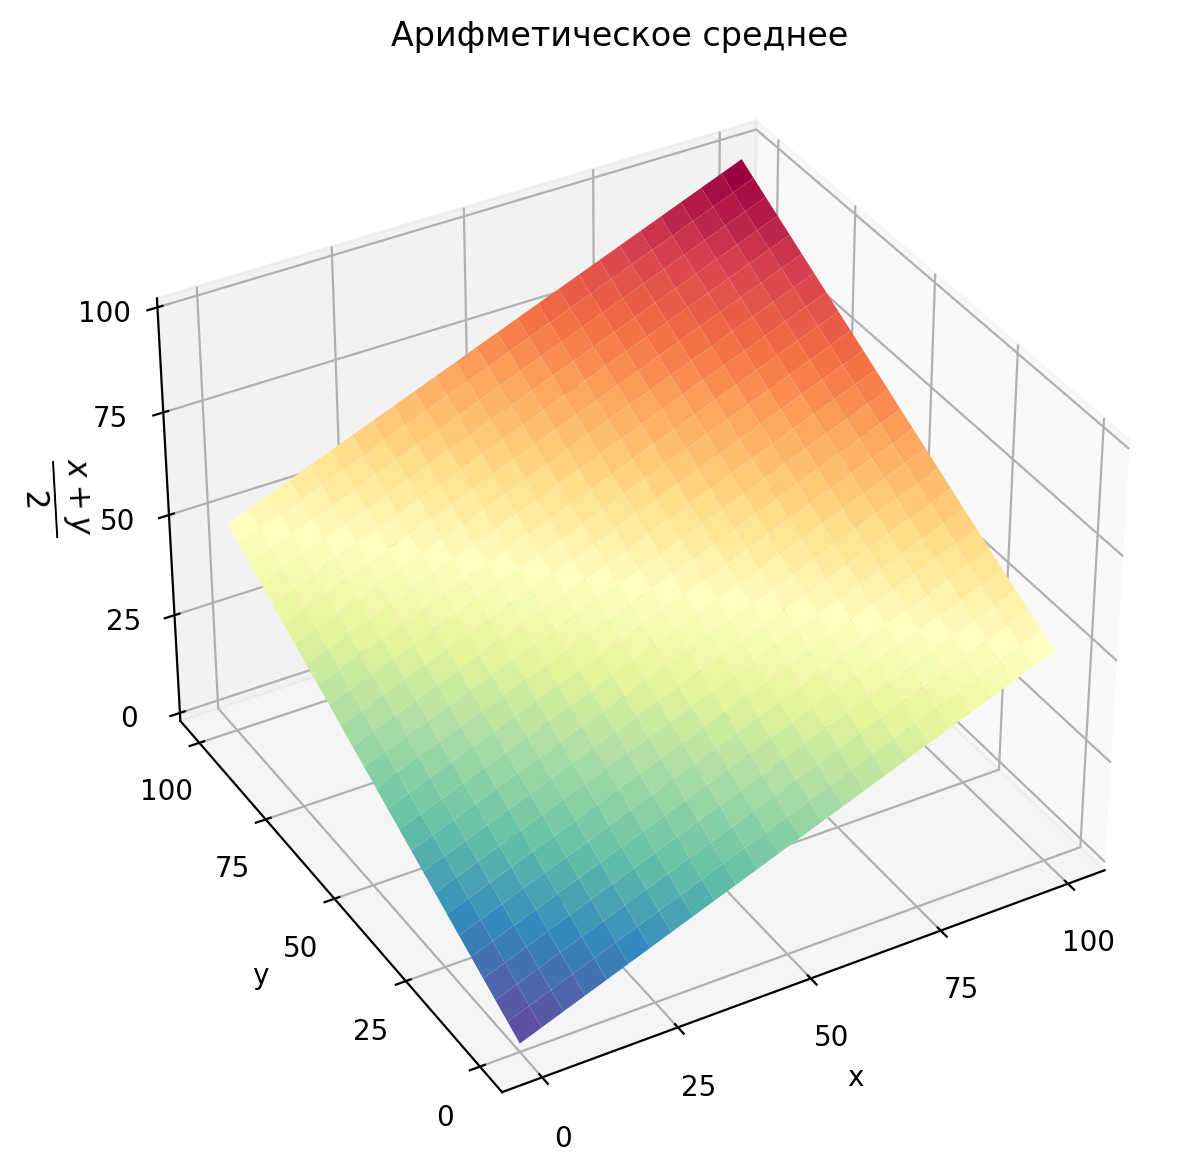

In [13]:
# создаем рисунок, задав его размер
fig = plt.figure(figsize=(10, 7))

# график будет отображаться как subplot
ax = fig.add_subplot(111, projection='3d')

# вызываем функцию построения поверхности, используя 
# градиентную заливку (параметр cmap)
ax.plot_surface(X, Y, Z, cmap='Spectral_r')

# задаем названия осей
ax.set(xlabel='x', ylabel='y')

# в случае оси Z используем возможности LaTeX для получения 
# красивого отображения формулы функции, корректируем размер 
# шрифта с помощью параметром fontsize
ax.set_zlabel(r'$\frac{x + y}{2}$', fontsize=16)

# задаем значения делений осей
ticks = [0, 25, 50, 75, 100]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)

# задаем начальное положение рисунка 
# с помощью углов отображения
ax.view_init(35, 240)

# задаем заголовок
ax.set_title("Арифметическое среднее");

In [14]:
# теперь ось Z - гармоническое среднее
Z = 1 / ((1 / X + 1 / Y) / 2)

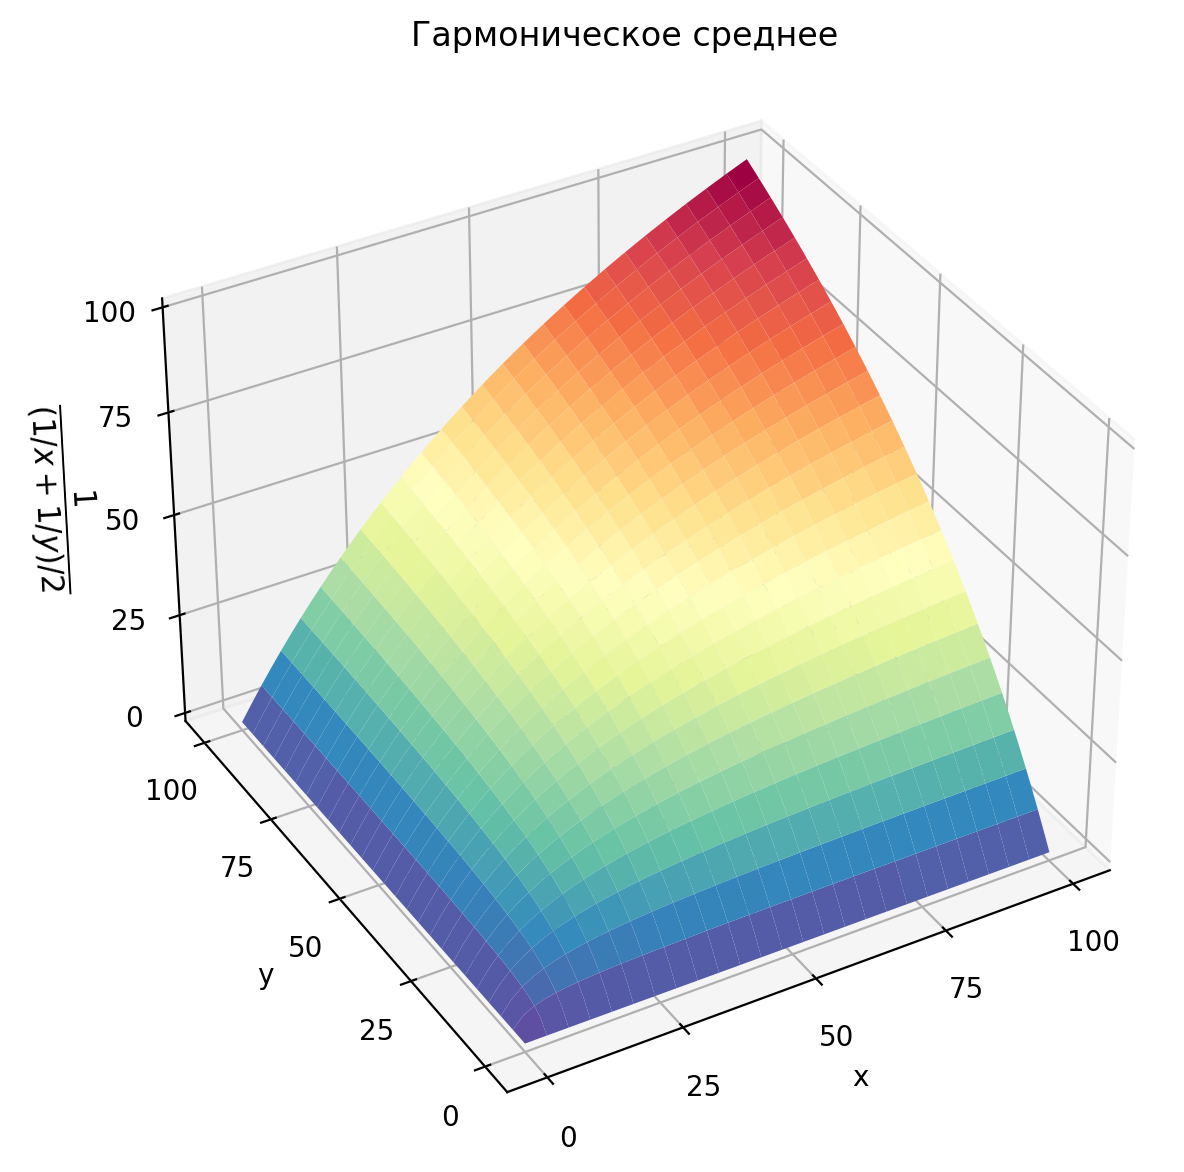

In [15]:
# создаем еще один рисунок для отображения 
# 3D-поверхности второй функции
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='Spectral_r')

# задаем названия осей
ax.set(xlabel='x', ylabel='y')

# в случае оси Z используем возможности LaTeX для получения 
# красивого отображения формулы функции, корректируем размер 
# шрифта с помощью параметром fontsize
ax.set_zlabel(r'$\frac{1}{(1/x + 1/y)/2}$', fontsize=16)

# задаем значения делений осей
ticks = [0, 25, 50, 75, 100]
ax.set_xticks(ticks)
ax.set_yticks(ticks) 
ax.set_zticks(ticks)

# задаем начальное положение рисунка 
# с помощью углов отображения
ax.view_init(35, 240)

# задаем заголовок
ax.set_title("Гармоническое среднее");

## 1.11. Варьирование порога отсечения

In [16]:
# задаем порог
mythreshold = 0.3
# получаем прогнозы согласно новому порогу
predictions = (data['probability'] >= mythreshold).astype(int)
# вычисляем матрицу ошибок
confusion = confusion_matrix(data['fact'], predictions)
# вычисляем чувствительность: TP/(TP+FN)
se = confusion[1][1] / (confusion[1][1] + confusion[1][0])
# вычисляем специфичность: TN/(TN+FP)
sp = confusion[0][0] / (confusion[0][0] + confusion[0][1])
# печатаем матрицу ошибок
print(f"Матрица ошибок для порога {mythreshold}:\n{confusion}")
# печатаем значение чувствительности
print(f"Чувствительность: {se:.3f}")
# печатаем значение специфичности
print(f"Специфичность: {sp:.3f}")

Матрица ошибок для порога 0.3:
[[413 333]
 [ 49 549]]
Чувствительность: 0.918
Специфичность: 0.554


In [17]:
# задаем порог
mythreshold = 0.7
# получаем прогнозы согласно новому порогу
predictions = (data['probability'] >= mythreshold)
# вычисляем матрицу ошибок
confusion = confusion_matrix(data['fact'], predictions)
# вычисляем чувствительность: TP/(TP+FN)
se = confusion[1][1] / (confusion[1][1] + confusion[1][0])
# вычисляем специфичность: TN/(TN+FP)
sp = confusion[0][0] / (confusion[0][0] + confusion[0][1])
# печатаем матрицу ошибок
print(f"Матрица ошибок для порога {mythreshold}:\n{confusion}")
# печатаем значение чувствительности
print(f"Чувствительность: {se:.3f}")
# печатаем значение специфичности
print(f"Специфичность: {sp:.3f}")

Матрица ошибок для порога 0.7:
[[729  17]
 [492 106]]
Чувствительность: 0.177
Специфичность: 0.977


In [18]:
# задаем порог
mythreshold = 0
# получаем прогнозы согласно новому порогу
predictions = (data['probability'] >= mythreshold)
# вычисляем матрицу ошибок
confusion = confusion_matrix(data['fact'], predictions)
# вычисляем чувствительность: TP/(TP+FN)
se = confusion[1][1] / (confusion[1][1] + confusion[1][0])
# вычисляем специфичность: TN/(TN+FP)
sp = confusion[0][0] / (confusion[0][0] + confusion[0][1])
# печатаем матрицу ошибок
print(f"Матрица ошибок для порога {mythreshold}:\n{confusion}")
# печатаем значение чувствительности
print(f"Чувствительность: {se:.3f}")
# печатаем значение специфичности
print(f"Специфичность: {sp:.3f}")

Матрица ошибок для порога 0:
[[  0 746]
 [  0 598]]
Чувствительность: 1.000
Специфичность: 0.000


In [19]:
# задаем порог
mythreshold = 1
# получаем прогнозы согласно новому порогу
predictions = (data['probability'] >= mythreshold)
# вычисляем матрицу ошибок
confusion = confusion_matrix(data['fact'], predictions)
# вычисляем чувствительность: TP/(TP+FN)
se = confusion[1][1] / (confusion[1][1] + confusion[1][0])
# вычисляем специфичность: TN/(TN+FP)
sp = confusion[0][0] / (confusion[0][0] + confusion[0][1])
# печатаем матрицу ошибок
print(f"Матрица ошибок для порога {mythreshold}:\n{confusion}")
# печатаем значение чувствительности
print(f"Чувствительность: {se:.3f}")
# печатаем значение специфичности
print(f"Специфичность: {sp:.3f}")

Матрица ошибок для порога 1:
[[746   0]
 [598   0]]
Чувствительность: 0.000
Специфичность: 1.000


## 1.12. Коэффициент Мэттьюса (Matthews correlation coefficient или MCC)

In [20]:
# из модуля sklearn.metrics импортируем 
# функцию matthews_corrcoef()
from sklearn.metrics import matthews_corrcoef
# вычисляем коэффициент Мэттьюса
matt_corr = matthews_corrcoef(data['fact'], data['predict'])
# печатаем коэффициент Мэттьюса
print("Коэффициент Мэттьюса: {:.3f}".format(matt_corr))

Коэффициент Мэттьюса: 0.507


## 1.13. Каппа Коэна (Cohen's cappa)

In [21]:
# из модуля sklearn.metrics импортируем 
# функцию cohen_kappa_score()
from sklearn.metrics import cohen_kappa_score
# вычисляем каппу Коэна
cohen_kappa = cohen_kappa_score(data['fact'], data['predict'])
# печатаем коэффициент Мэттьюса
print("Каппа Коэна: {:.3f}".format(cohen_kappa))

Каппа Коэна: 0.483


## 1.14. ROC-кривая (ROC curve) и площадь под ROC-кривой (AUC-ROC)

In [22]:
# создаем массив фактических значений (классов)
# зависимой переменной
classes = np.array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 
                    0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [23]:
# создаем массив спрогнозированных вероятностей 
# положительного класса
proba = np.array([0.92, 0.9, 0.88, 0.85, 0.82, 
                  0.79, 0.75, 0.73, 0.72, 0.7, 
                  0.6, 0.59, 0.58, 0.53, 0.52, 
                  0.4, 0.33, 0.32, 0.24, 0.18])

In [24]:
# пишем функцию, которая будет строить ROC-кривую
def _binary_clf_curve(y_true, y_score, sample_weight=None):
    """
    Вычисляет количество истинно положительных и 
    ложноположительных для каждого порогового значения
    вероятности положительного класса; предполагается, что
    наблюдение положительного класса всегда имеет метку 1

    Параметры
    ----------
    y_true : одномерный массив формы [n_samples]
        Фактические метки (классы) зависимой переменной.

    y_score : одномерный массив формы [n_samples]
        Спрогнозированные вероятности положительного класса.
        
    sample_weight : одномерный массив формы (n_samples,), 
                    по умолчанию None
        Веса наблюдений.

    Возвращает
    -------
    tps : одномерный массив        
        Количество истинно положительных случаев (tps), индекс i 
        фиксирует количество наблюдений положительного класса,
        которые получили оценку > = thresholds[i].
        Общее количество наблюдений положительного класса равно
        tps[-1] (таким образом, количество ложноотрицательных
        случаев определяется по формуле tps[-1] - tps).

    fps : одномерный массив
        Количество ложноположительных случаев (fps), индекс i
        фиксирует количество наблюдений отрицательного класса,
        которые получили оценку > = thresholds[i].
        Общее количество наблюдений отрицательного класса равно
        fps[-1] (таким образом, количество истинно отрицательных
        случаев определяется по формуле fps[-1] - fps).

    thresholds : одномерный массив
        Пороговые значения спрогнозированной вероятности
        положительного класса, отсортированные по убыванию.
    """
    
    # если для sample_weight задано не None
    if sample_weight is not None:
        # формируем булеву маску: True, если вес не равен 0,
        # False в противном случае
        nonzero_weight_mask = sample_weight != 0
        # с помощью булевой маски удаляем из массива
        # меток метки с нулевыми весами
        y_true = y_true[nonzero_weight_mask]
        # с помощью булевой маски удаляем из массива вероятностей
        # положительного класса вероятности с нулевыми весами
        y_score = y_score[nonzero_weight_mask]
        # с помощью булевой маски удаляем
        # из массива весов нулевые веса
        sample_weight = sample_weight[nonzero_weight_mask]       
        
    # получаем индексы вероятностей положительного класса,
    # отсортированных по убыванию 
    desc_score_indices = np.argsort(y_score)[::-1]
    # сортируем вероятности с помощью индексов
    y_score = y_score[desc_score_indices]
    # сортируем метки с помощью индексов
    y_true = y_true[desc_score_indices]
    
    # если для sample_weight задано не None
    if sample_weight is not None:
        # сортируем веса с помощью индексов
        weight = sample_weight[desc_score_indices]
    # в противном случае
    else:
        # все веса равны 1.0
        weight = 1.0

    # функция np.diff() возвращает n-ю разность элементов массива 
    # (по умолчанию n=1), которая так же может быть вычислена 
    # вдоль указанной оси или осям. с помощью np.where() получаем 
    # индексы порогов
    distinct_indices = np.where(np.diff(y_score))[0]
    # вычисляем индекс последнего порога
    #end = np.array([y_true.size - 1])
    # добавляем этот индекс в конец массива с индексами порогов
    #threshold_indices = np.hstack((distinct_indices, end))   
    threshold_indices = np.hstack((distinct_indices, y_true.size - 1))

    # получаем пороговые значения вероятности положительного класса
    # и количество истинно положительных случаев
    thresholds = y_score[threshold_indices]
    tps = np.cumsum(y_true * weight)[threshold_indices]

    # получаем количество ложноположительных случаев
    if sample_weight is not None:
        # (1 - y_true) = количество ложноположительных
        # наблюдений в каждом индексе
        fps = np.cumsum((1 - y_true) * weight)[threshold_indices]
    else:
        # (1 + threshold_indices) = количество положительных наблюдений
        # в каждом индексе, таким образом, количество положительных           
        # наблюдений минус количество истинно положительных = 
        # количество ложноположительных
        fps = (1 + threshold_indices) - tps

    return fps, tps, thresholds

In [25]:
# применяем нашу функцию _binary_clf_curve()
fps, tps, thresholds = _binary_clf_curve(classes, proba)
print(f"пороги:\n{thresholds}\n")
print(f"количество ложноположительных:\n{fps}\n")
print(f"количество истинно положительных:\n{tps}")

пороги:
[0.92 0.9  0.88 0.85 0.82 0.79 0.75 0.73 0.72 0.7  0.6  0.59 0.58 0.53
 0.52 0.4  0.33 0.32 0.24 0.18]

количество ложноположительных:
[ 0.  0.  0.  1.  1.  1.  2.  2.  2.  3.  4.  5.  6.  7.  7.  8.  9. 10.
 11. 12.]

количество истинно положительных:
[1. 2. 3. 3. 4. 5. 5. 6. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8.]


доля ложноположительных:
[0.         0.         0.         0.         0.08333333 0.08333333
 0.08333333 0.16666667 0.16666667 0.16666667 0.25       0.33333333
 0.41666667 0.5        0.58333333 0.58333333 0.66666667 0.75
 0.83333333 0.91666667 1.        ]

доля истинно положительных:
[0.    0.125 0.25  0.375 0.375 0.5   0.625 0.625 0.75  0.875 0.875 0.875
 0.875 0.875 0.875 1.    1.    1.    1.    1.    1.   ]


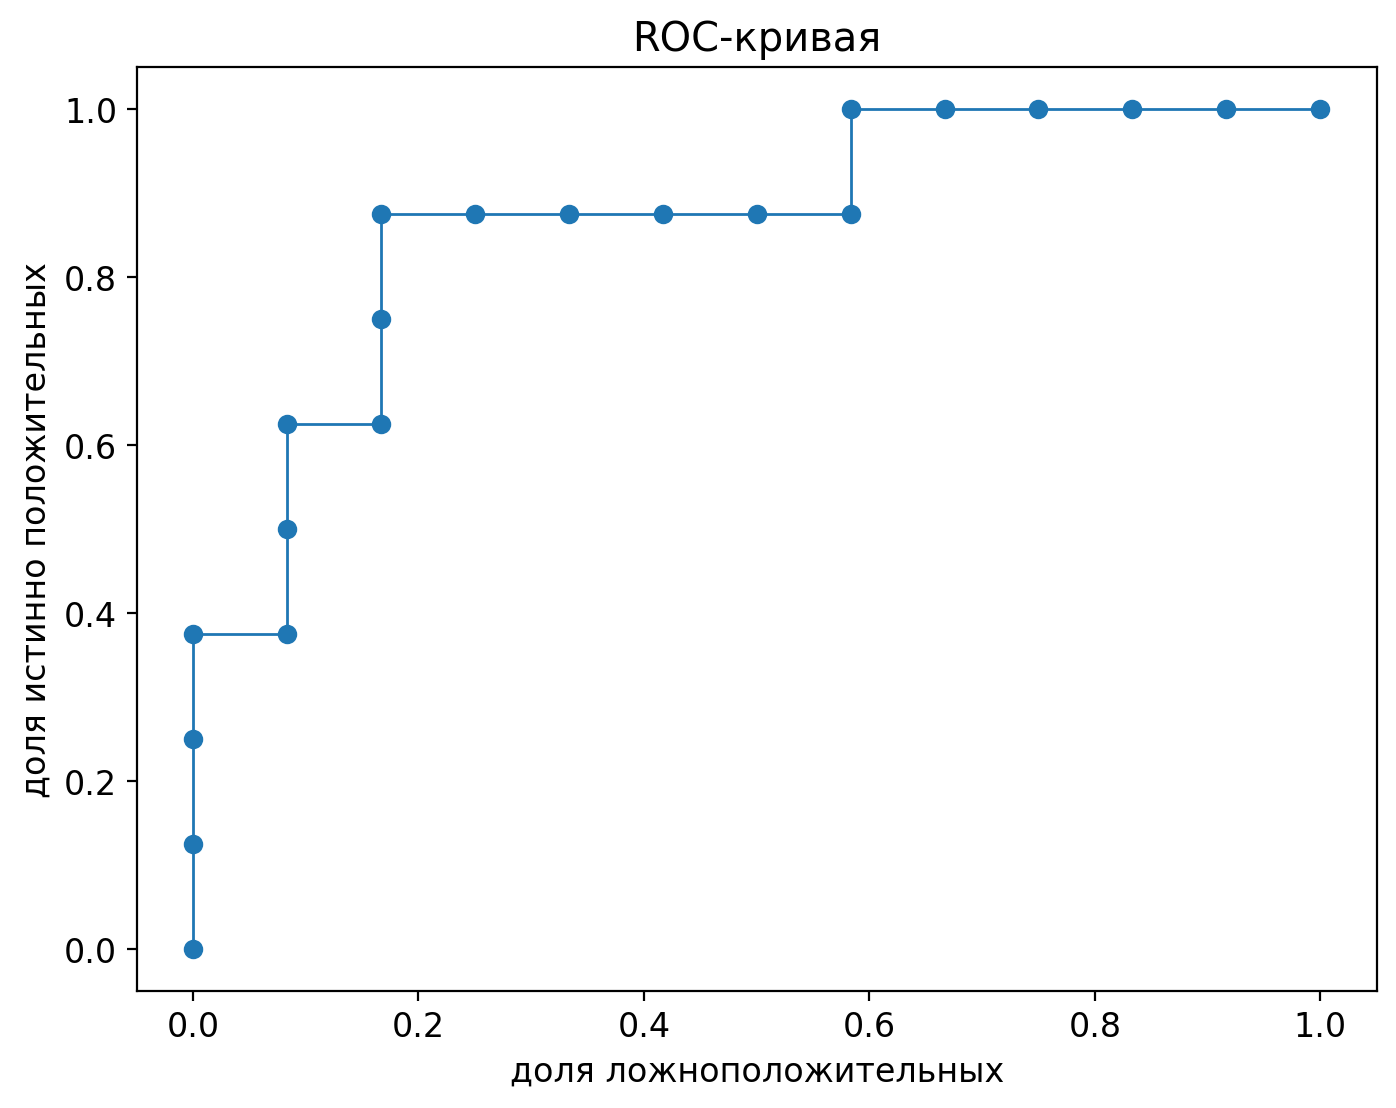

In [26]:
# преобразовываем количество в долю, добавляем 0
# к истинно положительным и ложноположительным,
# чтобы ROC-кривая брала начало в точке (0, 0)
fpr = np.hstack((0, fps / fps[-1]))
tpr = np.hstack((0, tps / tps[-1]))
print(f"доля ложноположительных:\n{fpr}\n")
print(f"доля истинно положительных:\n{tpr}")

# строим ROC-кривую
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

fig = plt.figure()
plt.plot(fpr, tpr, marker='o', lw=1)
plt.xlabel("доля ложноположительных")
plt.ylabel("доля истинно положительных")
plt.title("ROC-кривая")
plt.show()

In [27]:
# получаем индексы вероятностей положительного класса,
# отсортированных по убыванию 
desc_score_indices = np.argsort(proba)[::-1]
desc_score_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [28]:
# сортируем вероятности с помощью индексов
y_score = proba[desc_score_indices]
y_score

array([0.92, 0.9 , 0.88, 0.85, 0.82, 0.79, 0.75, 0.73, 0.72, 0.7 , 0.6 ,
       0.59, 0.58, 0.53, 0.52, 0.4 , 0.33, 0.32, 0.24, 0.18])

In [29]:
# сортируем метки с помощью индексов
y_true = classes[desc_score_indices]
y_true

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [30]:
# функция np.diff() возвращает n-ю разность элементов массива 
# (по умолчанию n=1), которая так же может быть вычислена 
# вдоль указанной оси или осям
np.diff(y_score)

array([-0.02, -0.02, -0.03, -0.03, -0.03, -0.04, -0.02, -0.01, -0.02,
       -0.1 , -0.01, -0.01, -0.05, -0.01, -0.12, -0.07, -0.01, -0.08,
       -0.06])

In [31]:
# с помощью np.where() получаем индексы уникальных порогов
distinct_indices = np.where(np.diff(y_score))[0]
distinct_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [32]:
# вычисляем индекс последнего порога
end = np.array([y_true.size - 1])
end

array([19])

In [33]:
# добавляем этот индекс в конец массива с индексами порогов
threshold_indices = np.hstack((distinct_indices, end))
threshold_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [34]:
# получаем пороговые значения вероятности положительного класса
thresholds = y_score[threshold_indices]
thresholds

array([0.92, 0.9 , 0.88, 0.85, 0.82, 0.79, 0.75, 0.73, 0.72, 0.7 , 0.6 ,
       0.59, 0.58, 0.53, 0.52, 0.4 , 0.33, 0.32, 0.24, 0.18])

In [35]:
# получаем количество истинноположительных случаев для каждого порога
tps = np.cumsum(y_true)[threshold_indices]
tps

array([1, 2, 3, 3, 4, 5, 5, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8])

In [36]:
# получаем количество ложно положительных случаев для каждого порога
fps = (1 + threshold_indices) - tps
fps

array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  4,  5,  6,  7,  7,  8,  9,
       10, 11, 12])

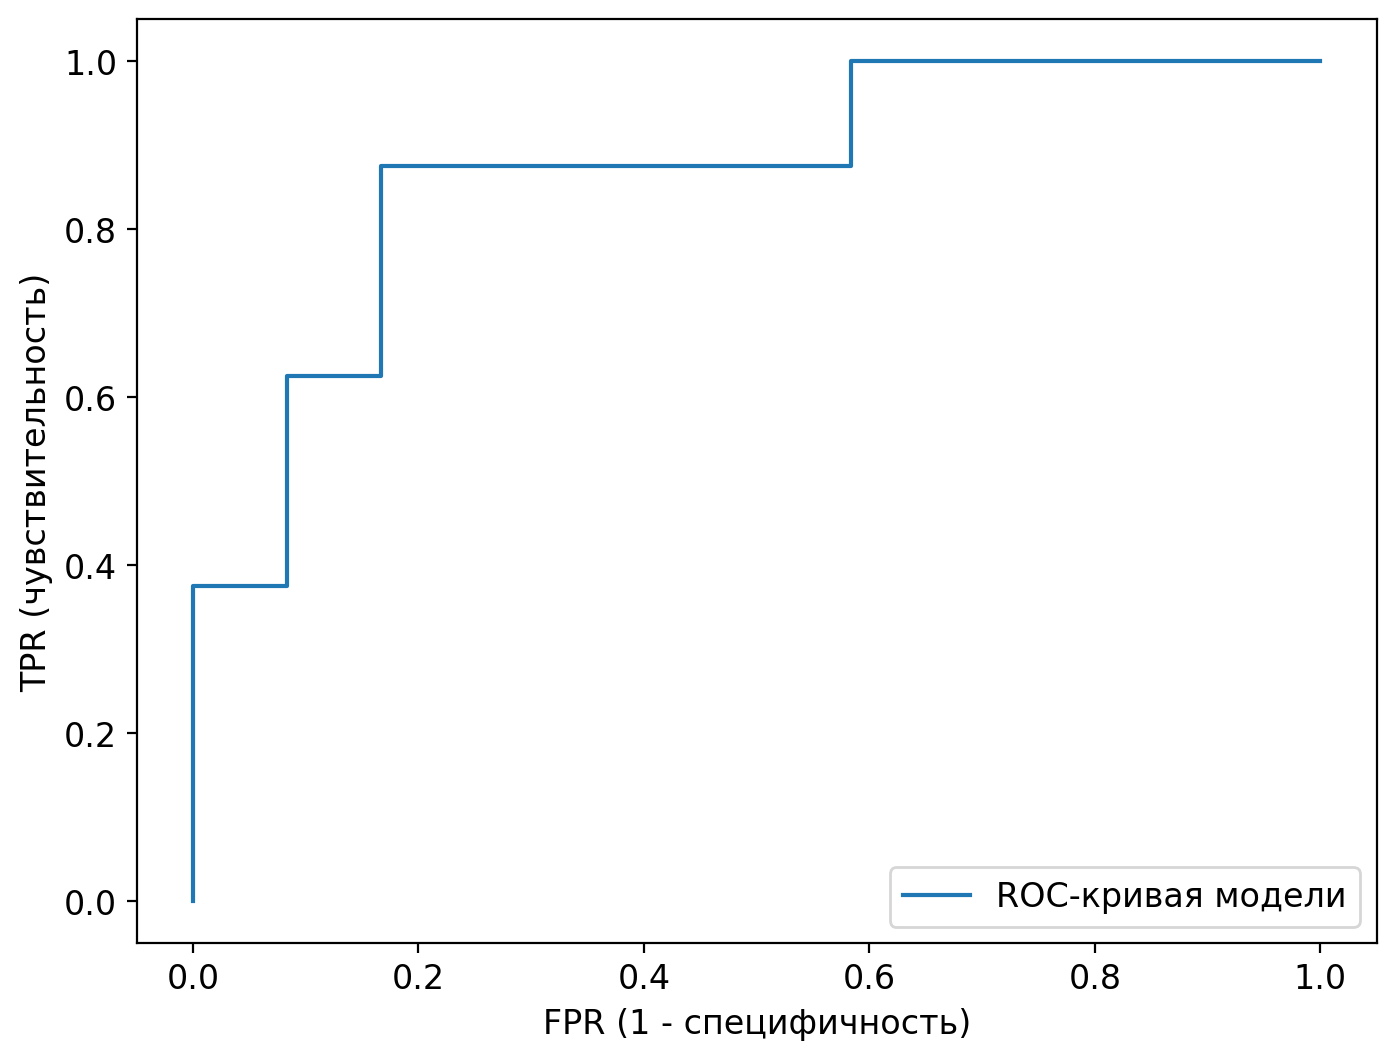

In [37]:
# из модуля sklearn.metrics импортируем функцию roc_curve()
from sklearn.metrics import roc_curve

# вычисляем значения FPR и TPR для всех возможных 
# порогов отсечения, передав функции roc_curve()
# в качестве аргументов фактические значения 
# зависимой переменной и вероятности 
fpr, tpr, thresholds = roc_curve(classes, proba)
# создаем заголовок ROC-кривой
plt.plot(fpr, tpr, label="ROC-кривая модели")
# задаем название для оси x
plt.xlabel("FPR (1 - специфичность)")
# задаем название для оси y
plt.ylabel("TPR (чувствительность)")
# задаем расположение легенды
plt.legend(loc=4);

In [38]:
# задаем веса наблюдений
sample_weights = np.array([1, 0, 1, 1, 1, 1, 1, 5, 1, 10,
                           10, 1, 1, 1, 1, 5, 1, 1, 1, 10])

# применяем нашу функцию _binary_clf_curve()
fps, tps, thresholds = _binary_clf_curve(
    classes, proba, 
    sample_weight=sample_weights)
print(f"пороги:\n{thresholds}\n")
print(f"количество ложноположительных:\n{fps}\n")
print(f"количество истинно положительных:\n{tps}")

пороги:
[0.92 0.88 0.85 0.82 0.79 0.75 0.73 0.72 0.7  0.6  0.59 0.58 0.53 0.52
 0.4  0.33 0.32 0.24 0.18]

количество ложноположительных:
[ 0  0  1  1  1  2  2  2 12 22 23 24 25 25 30 31 32 33 43]

количество истинно положительных:
[ 1  2  2  3  4  4  9 10 10 10 10 10 10 11 11 11 11 11 11]


доля ложноположительных:
[0.         0.         0.         0.02325581 0.02325581 0.02325581
 0.04651163 0.04651163 0.04651163 0.27906977 0.51162791 0.53488372
 0.55813953 0.58139535 0.58139535 0.69767442 0.72093023 0.74418605
 0.76744186 1.        ]

доля истинно положительных:
[0.         0.09090909 0.18181818 0.18181818 0.27272727 0.36363636
 0.36363636 0.81818182 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 1.         1.         1.         1.
 1.         1.        ]


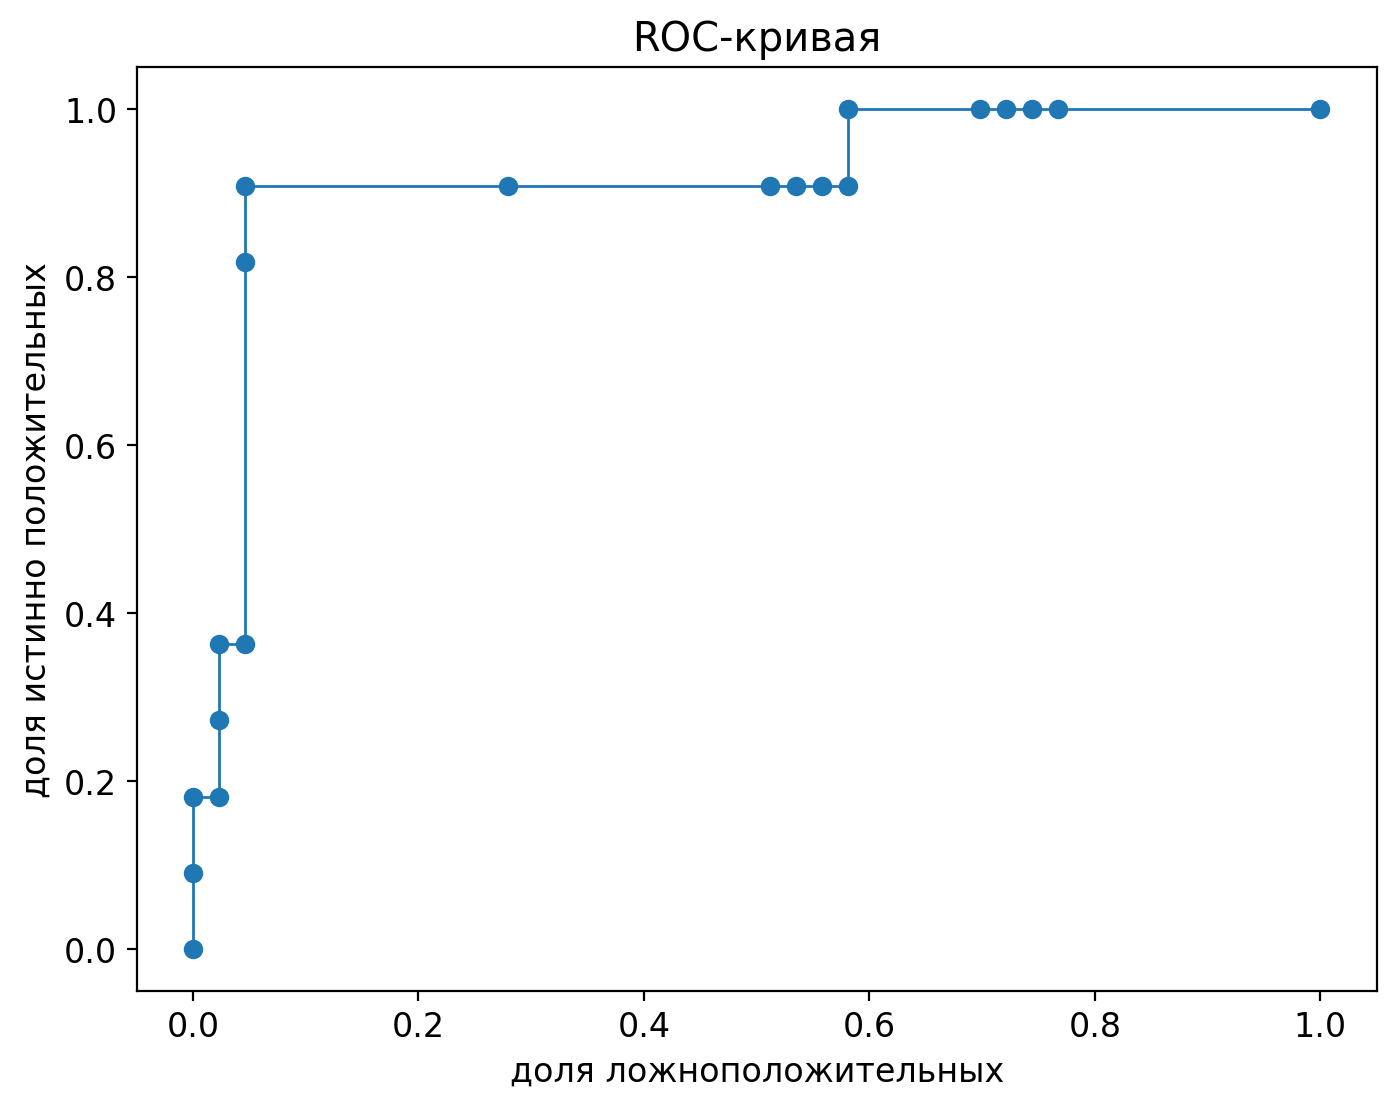

In [39]:
# преобразовываем количество в долю, добавляем 0
# к истинно положительным и ложноположительным,
# чтобы ROC-кривая брала начало в точке (0, 0)
fpr = np.hstack((0, fps / fps[-1]))
tpr = np.hstack((0, tps / tps[-1]))
print(f"доля ложноположительных:\n{fpr}\n")
print(f"доля истинно положительных:\n{tpr}")

# строим ROC-кривую
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

fig = plt.figure()
plt.plot(fpr, tpr, marker='o', lw=1)
plt.xlabel("доля ложноположительных")
plt.ylabel("доля истинно положительных")
plt.title("ROC-кривая")
plt.show()

In [40]:
# создаем булеву маску: True, если вес не равен 0,
# False в противном случае
nonzero_weight_mask = sample_weights != 0
nonzero_weight_mask

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [41]:
# с помощью булевой маски удаляем из массива
# меток метки с нулевыми весами
y_true = classes[nonzero_weight_mask]
y_true

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [42]:
# с помощью булевой маски удаляем из массива вероятностей
# положительного класса вероятности с нулевыми весами
y_score = proba[nonzero_weight_mask]
y_score

array([0.92, 0.88, 0.85, 0.82, 0.79, 0.75, 0.73, 0.72, 0.7 , 0.6 , 0.59,
       0.58, 0.53, 0.52, 0.4 , 0.33, 0.32, 0.24, 0.18])

In [43]:
# с помощью булевой маски удаляем
# из массива весов нулевые веса
smpl_weights = sample_weights[nonzero_weight_mask]  
smpl_weights

array([ 1,  1,  1,  1,  1,  1,  5,  1, 10, 10,  1,  1,  1,  1,  5,  1,  1,
        1, 10])

In [44]:
# получаем индексы вероятностей положительного класса,
# отсортированных по убыванию 
desc_score_indices = np.argsort(y_score)[::-1]
desc_score_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [45]:
# сортируем вероятности с помощью индексов
y_score = y_score[desc_score_indices]
y_score

array([0.92, 0.88, 0.85, 0.82, 0.79, 0.75, 0.73, 0.72, 0.7 , 0.6 , 0.59,
       0.58, 0.53, 0.52, 0.4 , 0.33, 0.32, 0.24, 0.18])

In [46]:
# сортируем метки с помощью индексов
y_true = y_true[desc_score_indices]
y_true

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [47]:
# сортируем веса с помощью индексов
weights = smpl_weights[desc_score_indices]
weights

array([ 1,  1,  1,  1,  1,  1,  5,  1, 10, 10,  1,  1,  1,  1,  5,  1,  1,
        1, 10])

In [48]:
# с помощью np.where() получаем индексы уникальных порогов
distinct_indices = np.where(np.diff(y_score))[0]
distinct_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [49]:
# вычисляем индекс последнего порога
end = np.array([y_true.size - 1])
end

array([18])

In [50]:
# добавляем этот индекс в конец массива с индексами порогов
threshold_indices = np.hstack((distinct_indices, end))
threshold_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [51]:
# получаем пороговые значения вероятности положительного класса
thresholds = y_score[threshold_indices]
thresholds

array([0.92, 0.88, 0.85, 0.82, 0.79, 0.75, 0.73, 0.72, 0.7 , 0.6 , 0.59,
       0.58, 0.53, 0.52, 0.4 , 0.33, 0.32, 0.24, 0.18])

In [52]:
# получаем количество истинно положительных случаев для каждого порога
tps = np.cumsum(y_true * weights)[threshold_indices]
tps

array([ 1,  2,  2,  3,  4,  4,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11])

In [53]:
# получаем количество ложноположительных случаев для каждого порога
fps = np.cumsum((1 - y_true) * weights)[threshold_indices]
fps

array([ 0,  0,  1,  1,  1,  2,  2,  2, 12, 22, 23, 24, 25, 25, 30, 31, 32,
       33, 43])

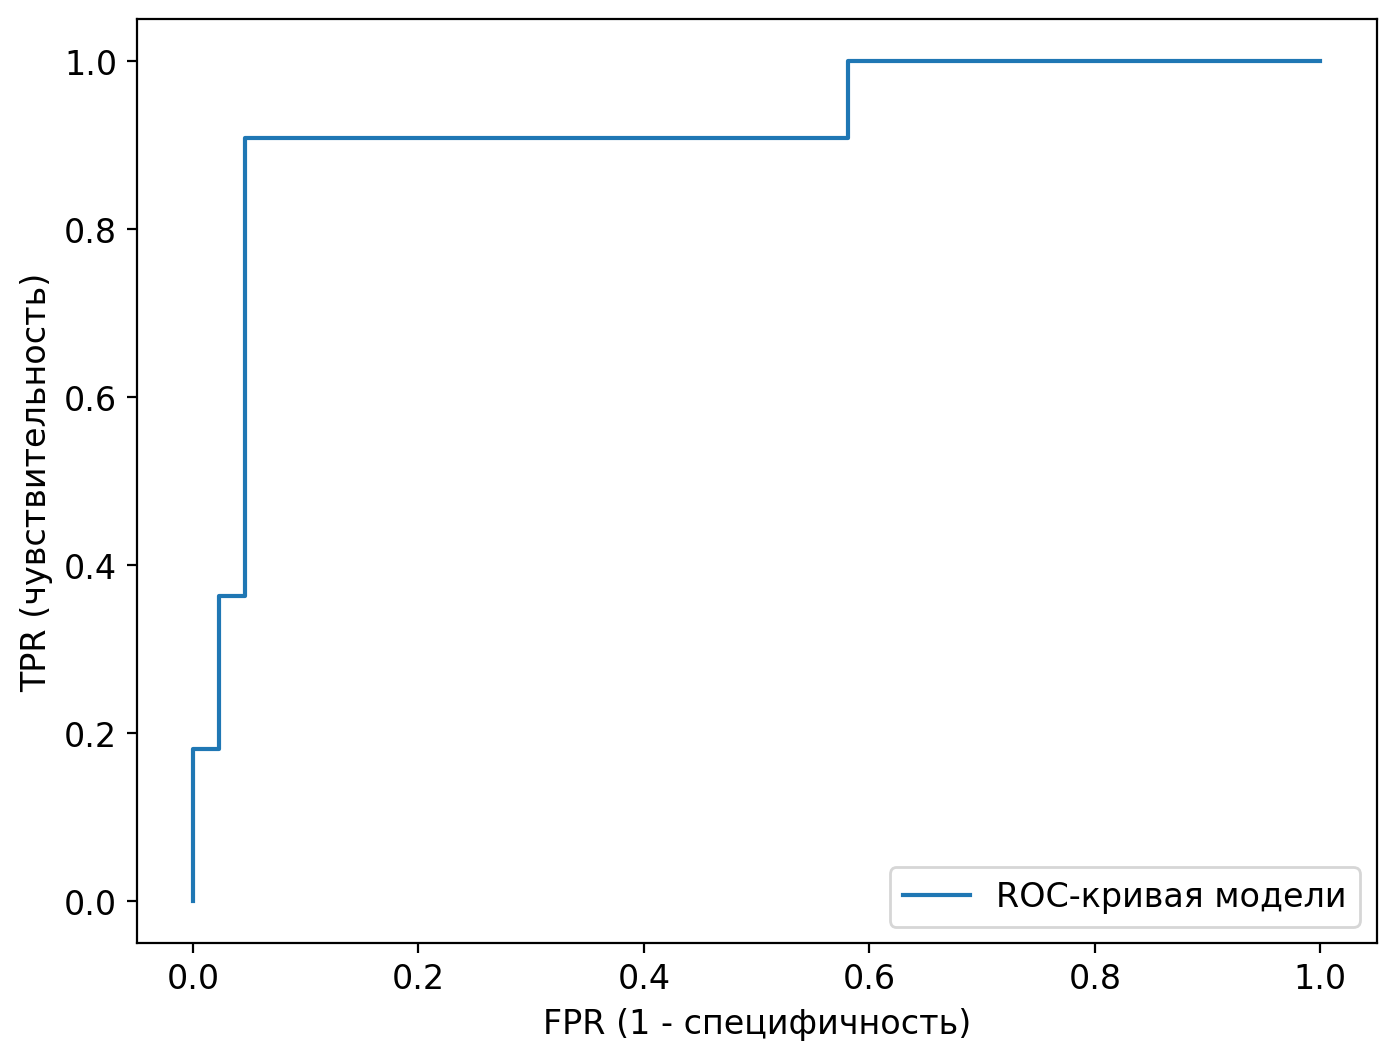

In [54]:
# вычисляем значения FPR и TPR для всех возможных 
# порогов отсечения, передав функции roc_curve()
# в качестве аргументов фактические значения 
# зависимой переменной, вероятности и веса
fpr, tpr, thresholds = roc_curve(
    classes, proba, sample_weight=sample_weights)
# создаем заголовок ROC-кривой
plt.plot(fpr, tpr, label="ROC-кривая модели")
# задаем название для оси x
plt.xlabel("FPR (1 - специфичность)")
# задаем название для оси y
plt.ylabel("TPR (чувствительность)")
# задаем расположение легенды
plt.legend(loc=4);

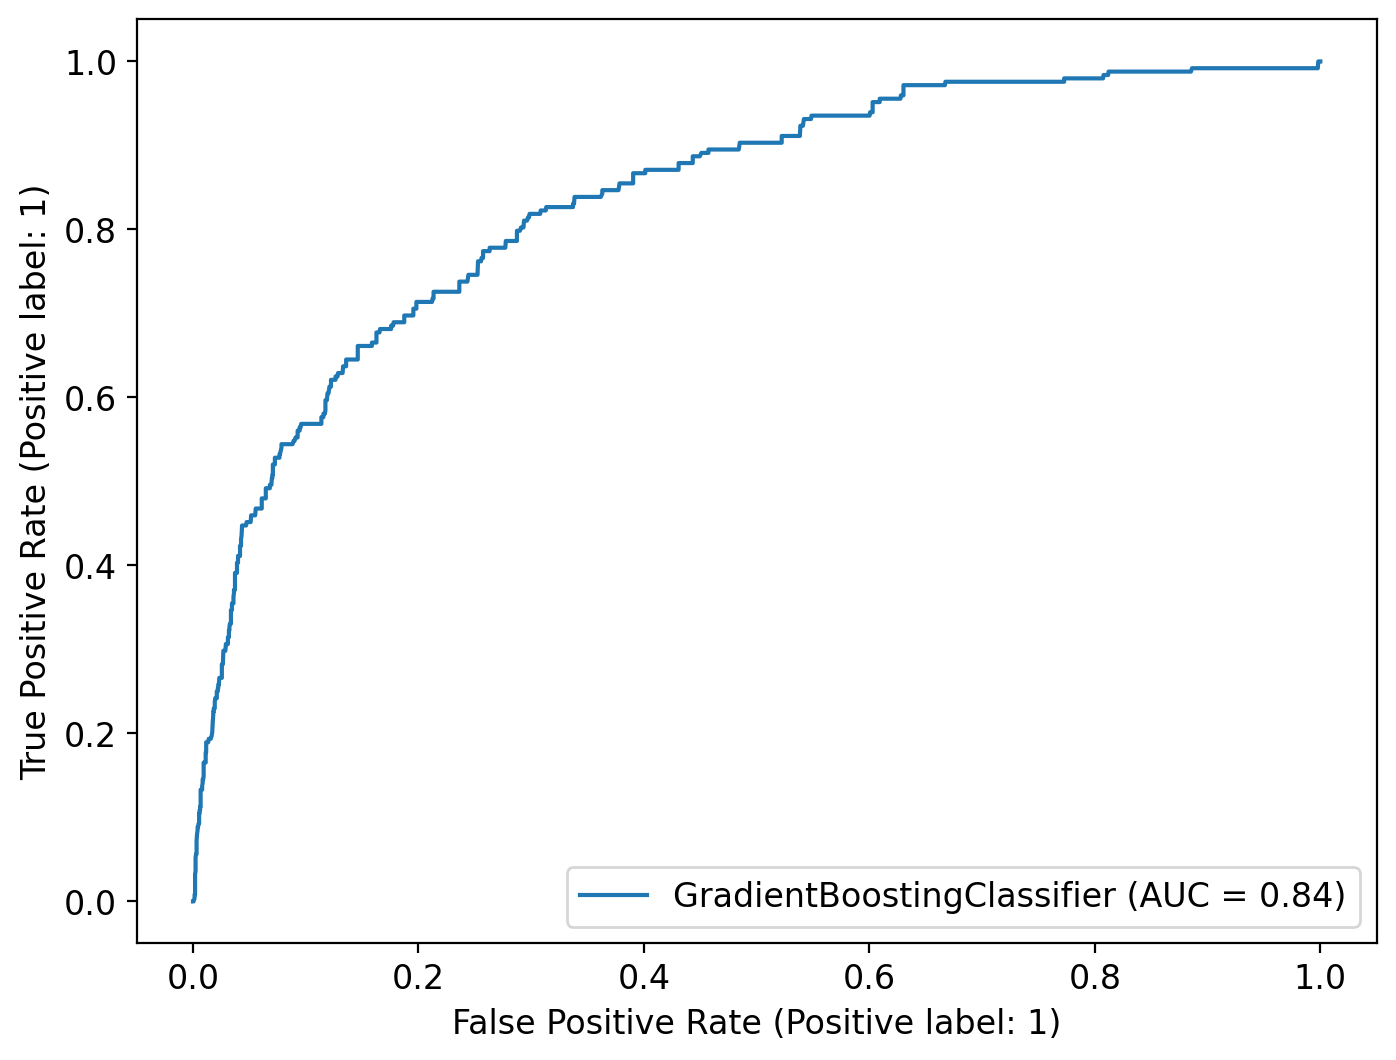

In [55]:
# импортируем необходимые функции и классы
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import GradientBoostingClassifier

# записываем CSV-файл в объект DataFrame
df = pd.read_csv('Data/StateFarm.csv', sep=';') 

# разбиваем данные на обучающие и тестовые: получаем обучающий
# массив признаков, тестовый массив признаков, обучающий массив
# меток, тестовый массив меток
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Response', axis=1), 
    df['Response'], 
    test_size=0.3,
    stratify=df['Response'],
    random_state=42)

# создаем экземпляр класса GradientBoostingClassifier
boost = GradientBoostingClassifier(
    subsample=0.8, random_state=42)
# обучаем модель
boost.fit(X_train, y_train)
# строим ROC-кривую для модели
RocCurveDisplay.from_estimator(boost, X_test, y_test);

In [56]:
# записываем CSV-файл в объект DataFrame
weird_data = pd.read_csv('Data/weird_roc.csv', sep=',')
weird_data.tail(10)

,fact,prob
1473,1,0.366743
1474,1,0.295093
1475,1,0.306020
1476,1,0.270486
1477,1,0.368694
1478,1,0.271503
1479,1,0.350956
1480,1,0.355348
1481,1,0.283862
1482,1,0.295863


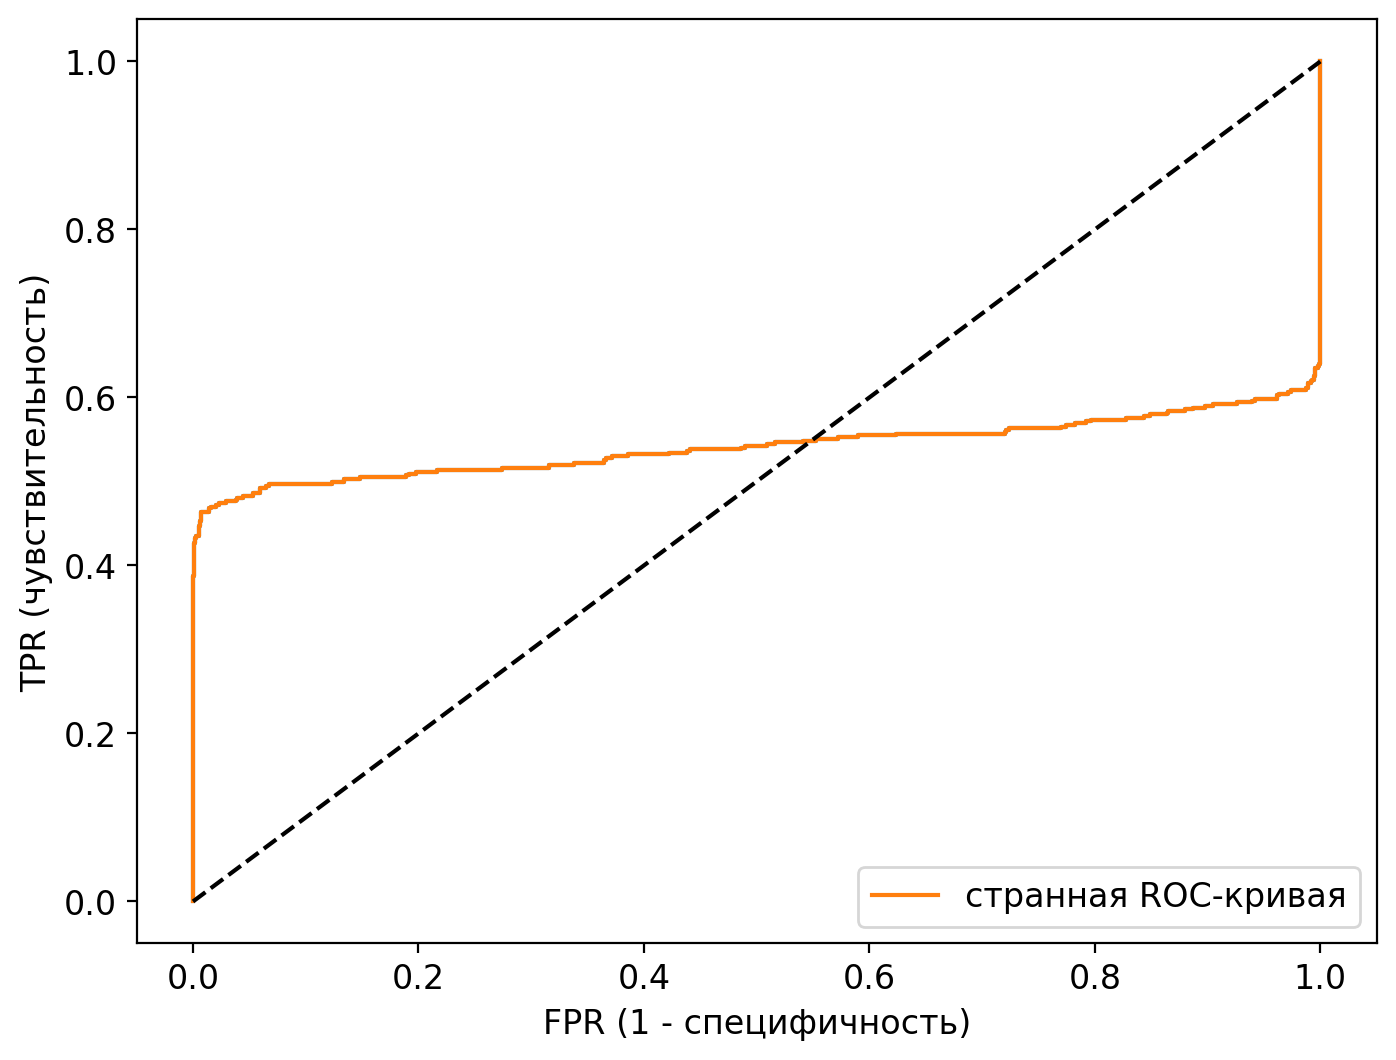

In [57]:
# строим ROC-кривую
fpr, tpr, thresholds = roc_curve(weird_data['fact'], 
                                 weird_data['prob'])
plt.plot(fpr, tpr)
plt.xlabel("FPR (1 - специфичность)")
plt.ylabel("TPR (чувствительность)")
plt.plot(fpr, tpr, label="странная ROC-кривая")
plt.plot([0, 1], [0, 1], "k--")
plt.legend(loc=4);

In [58]:
# пишем функцию, которая будет вычислять AUC-ROC
def _roc_auc_score(y_true, y_score):
    """
    Вычисляет AUC-ROC

    Параметры
    ----------
    y_true : одномерный массив формы [n_samples]
        Фактические метки (классы) зависимой переменной.

    y_score : одномерный массив формы [n_samples]
        Спрогнозированные вероятности положительного класса.

    Возвращает
    -------
    auc : float
    """

    # убедимся, что зависимая переменная является бинарной
    if np.unique(y_true).size != 2:
        raise ValueError(
            "Лишь два класса должно быть в y_true. Значение "
            "AUC-ROC не определяется в данном случае.")
    
    # получаем с помощью функции _binary_clf_curve()
    # значения чувствительности и 1 - специфичности
    fps, tps, _ = _binary_clf_curve(y_true, y_score)

    # переходим к долям
    tpr = tps / tps[-1]
    fpr = fps / fps[-1]

    # вычисляем AUC с помощью метода трапеций
    # добавляем 0 для обеспечения соответствия длины
    zero = np.array([0])
    tpr_diff = np.hstack((np.diff(tpr), zero))
    fpr_diff = np.hstack((np.diff(fpr), zero))
    auc = np.dot(tpr, fpr_diff) + np.dot(tpr_diff, fpr_diff) / 2
    return auc

In [59]:
# вычисляем значение AUC-ROC, передав нашей функции 
# _roc_auc_score() в качестве аргументов фактические 
# значения зависимой переменной и вероятности 
auc_roc = _roc_auc_score(classes, proba)
# печатаем AUC-ROC
auc_roc

0.8645833333333334

In [60]:
# импортируем функцию roc_auc_score()
from sklearn.metrics import roc_auc_score
# вычисляем значение AUC-ROC, передав функции 
# roc_auc_score() в качестве аргументов фактические 
# значения зависимой переменной и вероятности 
auc_roc = roc_auc_score(classes, proba)
# печатаем AUC-ROC
auc_roc

0.8645833333333333

In [61]:
# иногда можно получить AUC-ROC меньше 0.5
cl = np.array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

pr = np.array([0.45, 0.41, 0.51, 0.58, 0.86, 
               0.42, 0.72, 0.18, 0.44, 0.95])

auc_roc = roc_auc_score(cl, pr)
auc_roc

0.09523809523809525

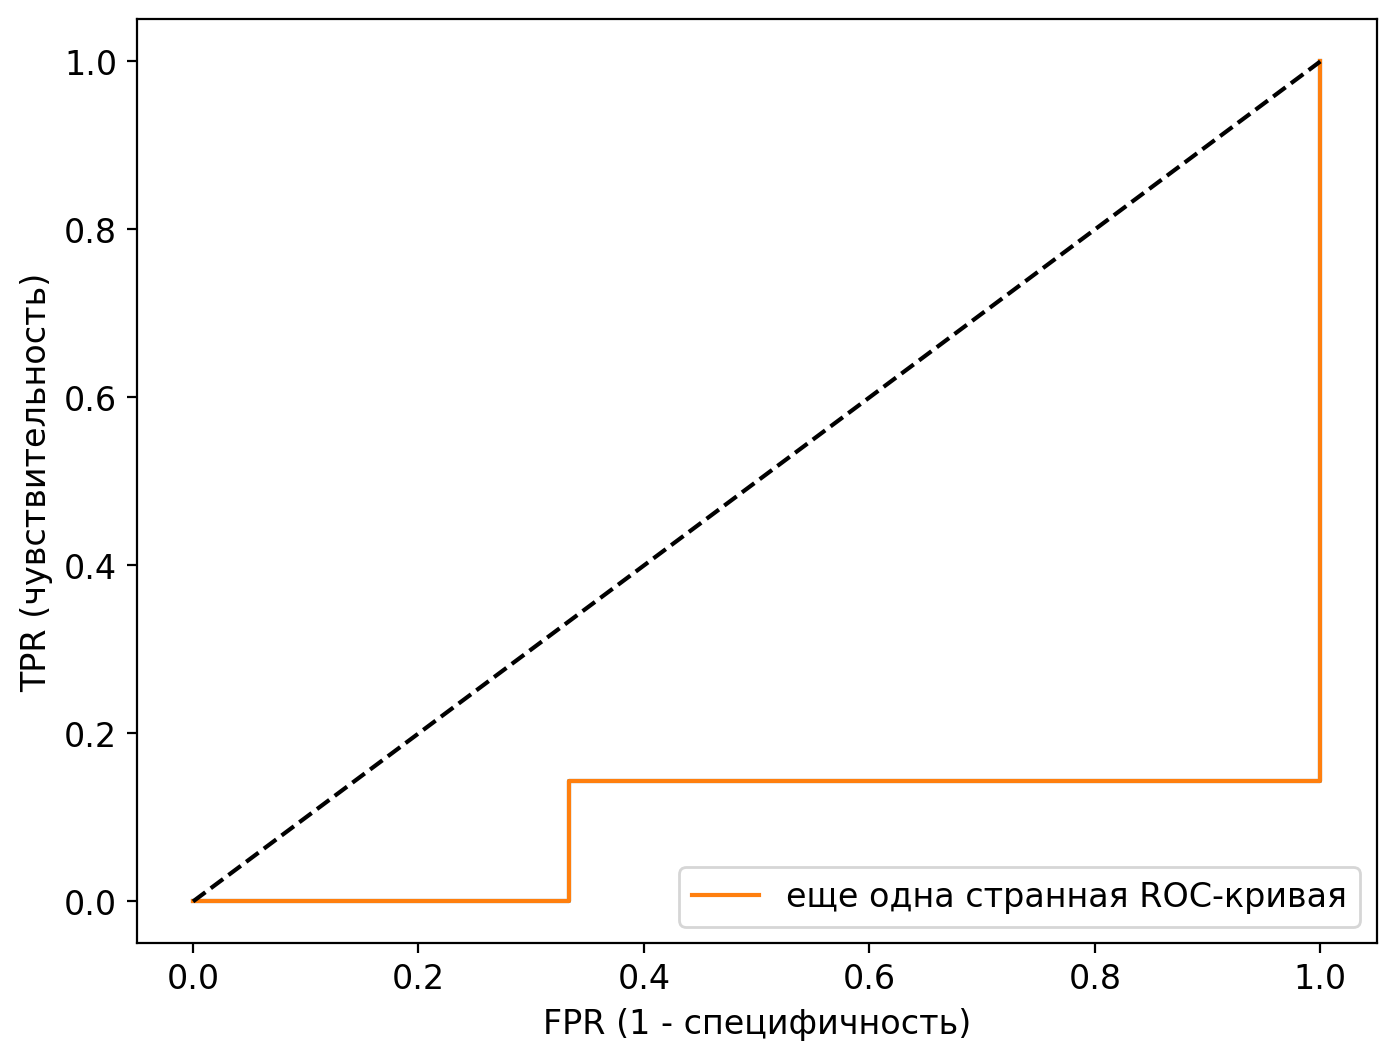

In [62]:
# строим ROC-кривую
fpr, tpr, thresholds = roc_curve(cl, pr)
plt.plot(fpr, tpr)
plt.xlabel("FPR (1 - специфичность)")
plt.ylabel("TPR (чувствительность)")
plt.plot(fpr, tpr, label="еще одна странная ROC-кривая")
plt.plot([0, 1], [0, 1], "k--")
plt.legend(loc=4);

In [63]:
# выполняем инверсию меток классов
invert_cl = np.where(cl == 1, 0, 1)
auc_roc = roc_auc_score(invert_cl, pr)
auc_roc

0.9047619047619049

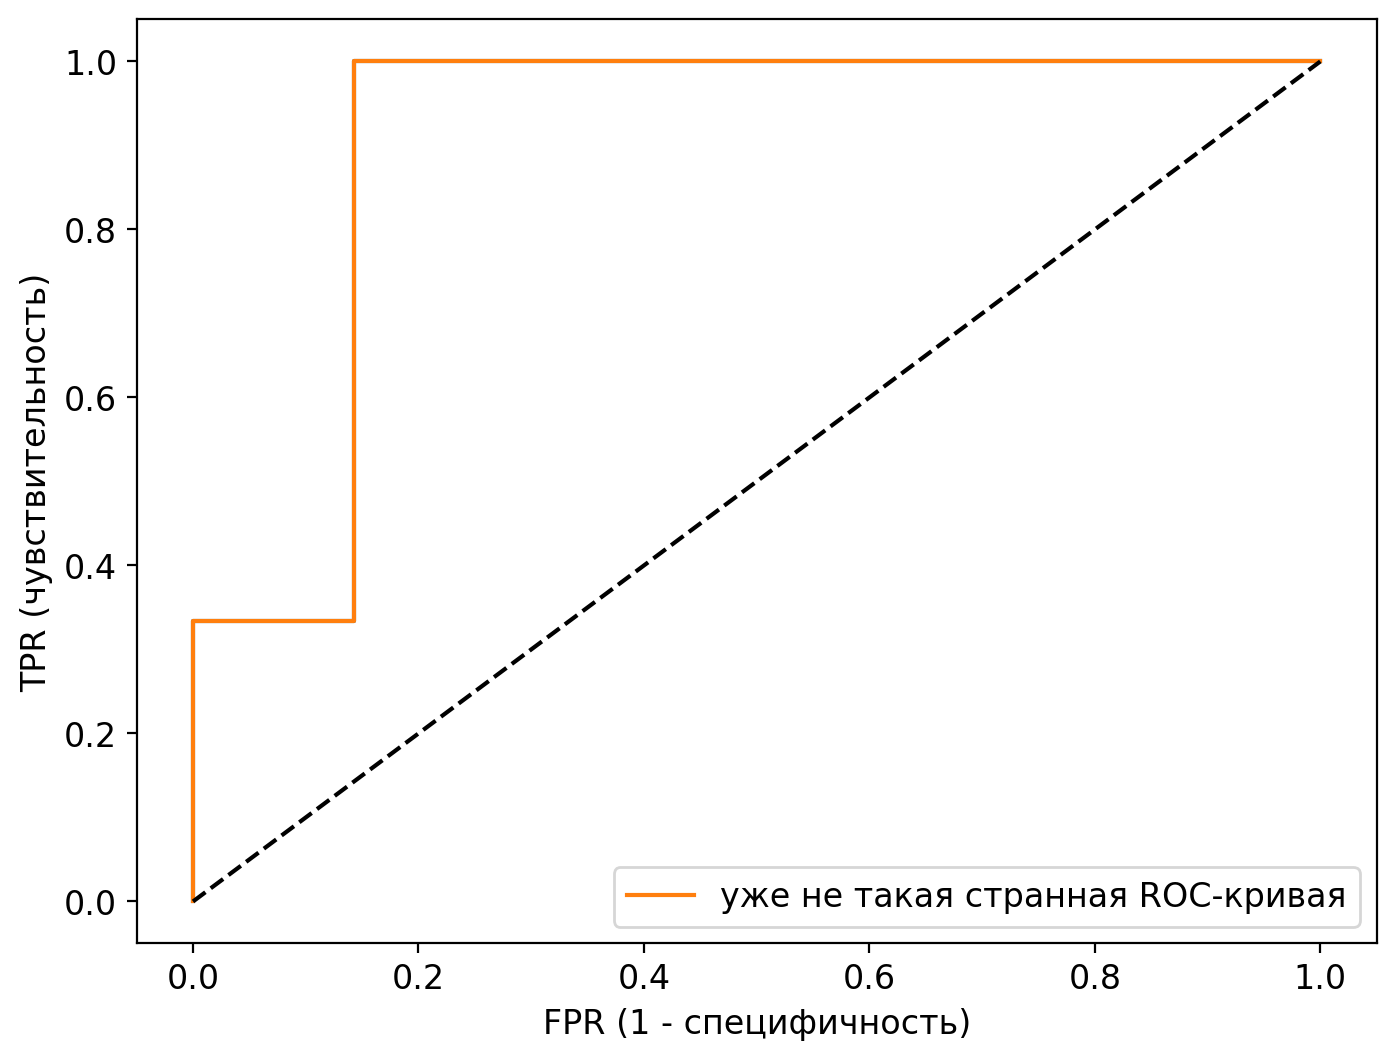

In [64]:
# строим ROC-кривую
fpr, tpr, thresholds = roc_curve(invert_cl, pr)
plt.plot(fpr, tpr)
plt.xlabel("FPR (1 - специфичность)")
plt.ylabel("TPR (чувствительность)")
plt.plot(fpr, tpr, label="уже не такая странная ROC-кривая")
plt.plot([0, 1], [0, 1], "k--")
plt.legend(loc=4);

In [65]:
# импортируем класс RandomState
from numpy.random import RandomState

In [66]:
# создаем массив меток классов зависимой переменной
classes = np.array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
                    0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

# создаем массив спрогнозированных вероятностей 
# положительного класса
proba = np.array([0.92, 0.9, 0.88, 0.85, 0.82, 
                  0.79, 0.75, 0.73, 0.72, 0.7, 
                  0.6, 0.59, 0.58, 0.53, 0.52, 
                  0.4, 0.33, 0.32, 0.24, 0.18])

In [67]:
# записываем вероятности положительных 
# и отрицательных примеров 
pos = proba[np.where(classes == 1)]
neg = proba[np.where(classes == 0)]

In [68]:
# задаем стартовое значение генератора
# случайных чисел для воспроизводимости
seed = 14

# извлекаем случайным образом положительные и  
# отрицательные примеры и вычисляем долю случаев, 
# когда положительные примеры получили более 
# высокую вероятность, чем отрицательные
size = 200000
random_pos = RandomState(seed).choice(pos, size=size)
random_neg = RandomState(seed).choice(neg, size=size)
p = np.sum(random_pos > random_neg) / size
p

0.86439

In [69]:
# вычислим AUC вручную
denominator = np.bincount(classes)[0] * np.bincount(classes)[1]
numerator = (12 + 12 + 12 + 11 + 11 + 10 + 10 + 5)
manually_calculated_auc = numerator / denominator
print("AUC-ROC {0:.4f}".format(manually_calculated_auc))

AUC-ROC 0.8646


In [70]:
# модифицируем массив спрогнозированных вероятностей 
# положительного класса
proba = np.array([0.95, 0.91, 0.84, 0.81, 0.80, 
                  0.78, 0.74, 0.72, 0.69, 0.68, 
                  0.65, 0.59, 0.57, 0.55, 0.53, 
                  0.51, 0.49, 0.45, 0.41, 0.38])

In [71]:
# вычислим AUC вручную
denominator = np.bincount(classes)[0] * np.bincount(classes)[1]
numerator = (12 + 12 + 12 + 12 + 12 + 12 + 12 + 12)
manually_calculated_auc = numerator / denominator
print("AUC-ROC {0:.4f}".format(manually_calculated_auc))

AUC-ROC 1.0000


In [72]:
# модифицируем массив спрогнозированных вероятностей 
# положительного класса
proba = np.array([0.92, 0.9, 0.88, 0.88, 0.82,
                  0.79, 0.75, 0.73, 0.72, 0.7, 
                  0.6, 0.59, 0.58, 0.53, 0.52, 
                  0.4, 0.33, 0.32, 0.24, 0.18])

In [73]:
# вычислим AUC вручную
denominator = np.bincount(classes)[0] * np.bincount(classes)[1]
numerator = (12 + 12 + 11.5 + 11 + 11 + 10 + 10 + 5)
manually_calculated_auc = numerator / denominator
print("AUC-ROC {0:.4f}".format(manually_calculated_auc))

AUC-ROC 0.8594


In [74]:
# 50% неверных прогнозов и AUC-ROC 1
cl = np.array([1, 1, 1, 0, 0, 0])
pr = np.array([0.45, 0.40, 0.38, 0.35, 0.33, 0.3])
predictions = np.where(pr >= 0.5, 1, 0)
print("auc-roc", roc_auc_score(cl, pr))
print("правильность", accuracy_score(cl, predictions))

auc-roc 1.0
правильность 0.5


In [75]:
# 83% неверных прогнозов и AUC-ROC 1
cls = np.array([1, 1, 1, 1, 1, 0])
prb = np.array([0.45, 0.43, 0.38, 0.36, 0.33, 0.3])
preds = np.where(prb >= 0.5, 1, 0)
print("auc-roc", roc_auc_score(cls, prb))
print("правильность", accuracy_score(cls, preds))

auc-roc 1.0
правильность 0.16666666666666666


In [76]:
# создаем массив меток зависимой переменной 
# (идеальный баланс) 
cl = np.hstack([np.ones(10), np.zeros(10)])
cl

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [77]:
# создаем массив вероятностей первого классификатора
pr = np.hstack([np.ones(5), np.zeros(5), .25 * np.ones(10)])
pr

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [78]:
# создаем массив вероятностей второго классификатора
pr2 = np.hstack([np.zeros(5), np.ones(5), .25 * np.ones(10)])
pr2

array([0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [79]:
# смотрим AUC классификаторов
print(
    roc_auc_score(cl, pr),
    roc_auc_score(cl, pr2),
    roc_auc_score(cl, pr + pr2)
)

0.5 0.5 1.0


In [80]:
# изобразим более наглядно
results = np.column_stack((cl, pr, pr2, pr + pr2))
results

array([[1.  , 1.  , 0.  , 1.  ],
       [1.  , 1.  , 0.  , 1.  ],
       [1.  , 1.  , 0.  , 1.  ],
       [1.  , 1.  , 0.  , 1.  ],
       [1.  , 1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  , 1.  ],
       [1.  , 0.  , 1.  , 1.  ],
       [1.  , 0.  , 1.  , 1.  ],
       [1.  , 0.  , 1.  , 1.  ],
       [1.  , 0.  , 1.  , 1.  ],
       [0.  , 0.25, 0.25, 0.5 ],
       [0.  , 0.25, 0.25, 0.5 ],
       [0.  , 0.25, 0.25, 0.5 ],
       [0.  , 0.25, 0.25, 0.5 ],
       [0.  , 0.25, 0.25, 0.5 ],
       [0.  , 0.25, 0.25, 0.5 ],
       [0.  , 0.25, 0.25, 0.5 ],
       [0.  , 0.25, 0.25, 0.5 ],
       [0.  , 0.25, 0.25, 0.5 ],
       [0.  , 0.25, 0.25, 0.5 ]])

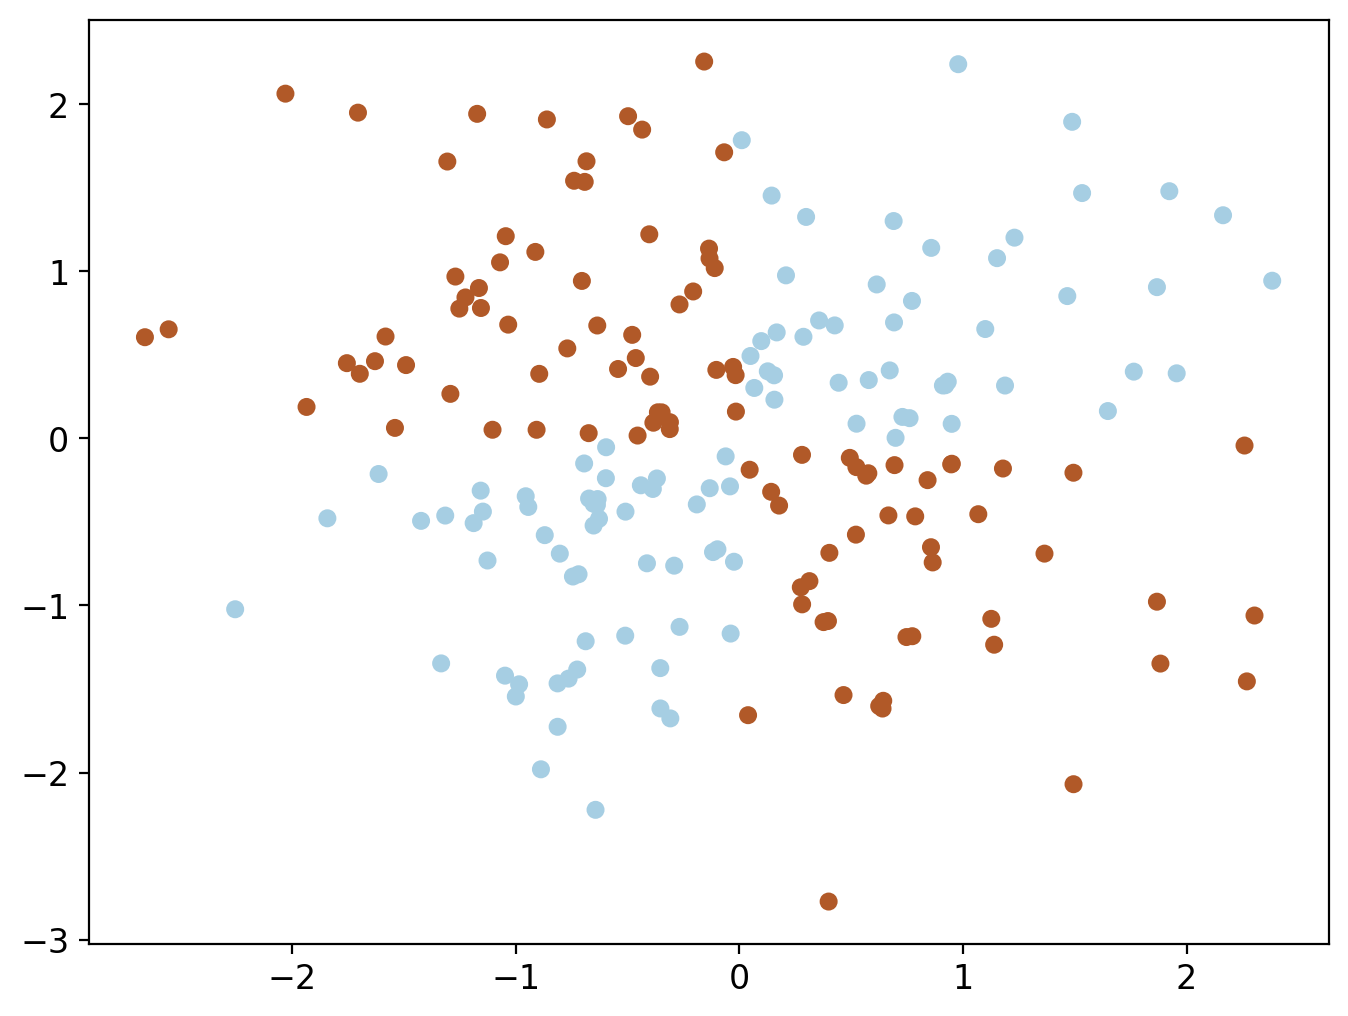

In [81]:
# пример задачи XOR
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], 
            X[:, 1], 
            s=30, 
            c=y, 
            cmap=plt.cm.Paired);

In [82]:
# импортируем класс SGDClassifier
from sklearn.linear_model import SGDClassifier

# создаем массив признаков
X = np.array([[-1, -1], 
              [+1, +1], 
              [-1, +1], 
              [+1, -1]])

# создаем массив меток
y = [0, 0, 1, 1]

# строим логистическую регрессию
logreg = SGDClassifier(loss='log', 
                       max_iter=500, 
                       random_state=42)
logreg.fit(X, y)

# печатаем вероятности, коэффициенты и AUC-ROC
print("вероятности:", np.round(
    logreg.predict_proba(X)[:, 1], 3))
print("коэффициенты:", logreg.coef_)
print("auc_roc:", roc_auc_score(
    y, logreg.predict_proba(X)[:, 1]))

вероятности: [0.999 0.    0.199 0.144]
коэффициенты: [[-4.47126728 -4.27824711]]
auc_roc: 0.5


/Users/artemgruzdev/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


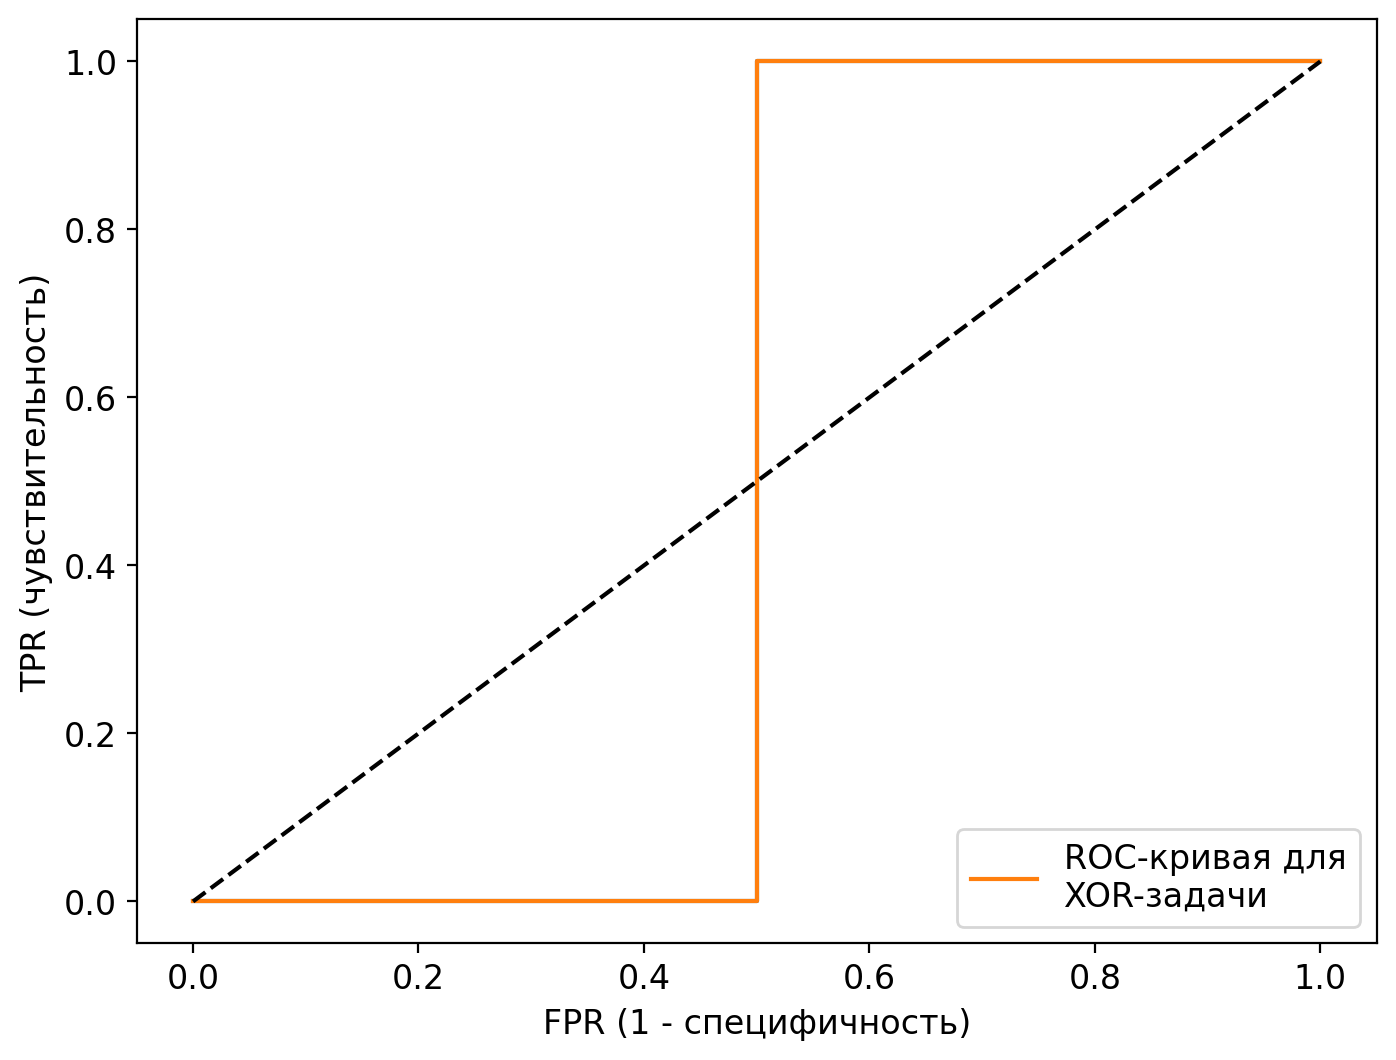

In [83]:
# строим ROC-кривую для XOR-задачи
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel("FPR (1 - специфичность)")
plt.ylabel("TPR (чувствительность)")
plt.plot(fpr, tpr, label="ROC-кривая для\nXOR-задачи")
plt.plot([0, 1], [0, 1], "k--")
plt.legend(loc=4);

In [84]:
# проверяем решение
cl = np.array([0, 0, 1, 1])
pr = np.array([0.165, 0.5, 0.5, 0.835])
roc_auc_score(cl, pr)

0.875

In [85]:
# создаем массив меток и массив вероятностей
cl = np.array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0])
pr = np.array([0.9, 0.8, 0.7, 0.6, 0.5, 
               0.4, 0.3, 0.2, 0.1, 0.05])
roc_auc_score(cl, pr)

0.8

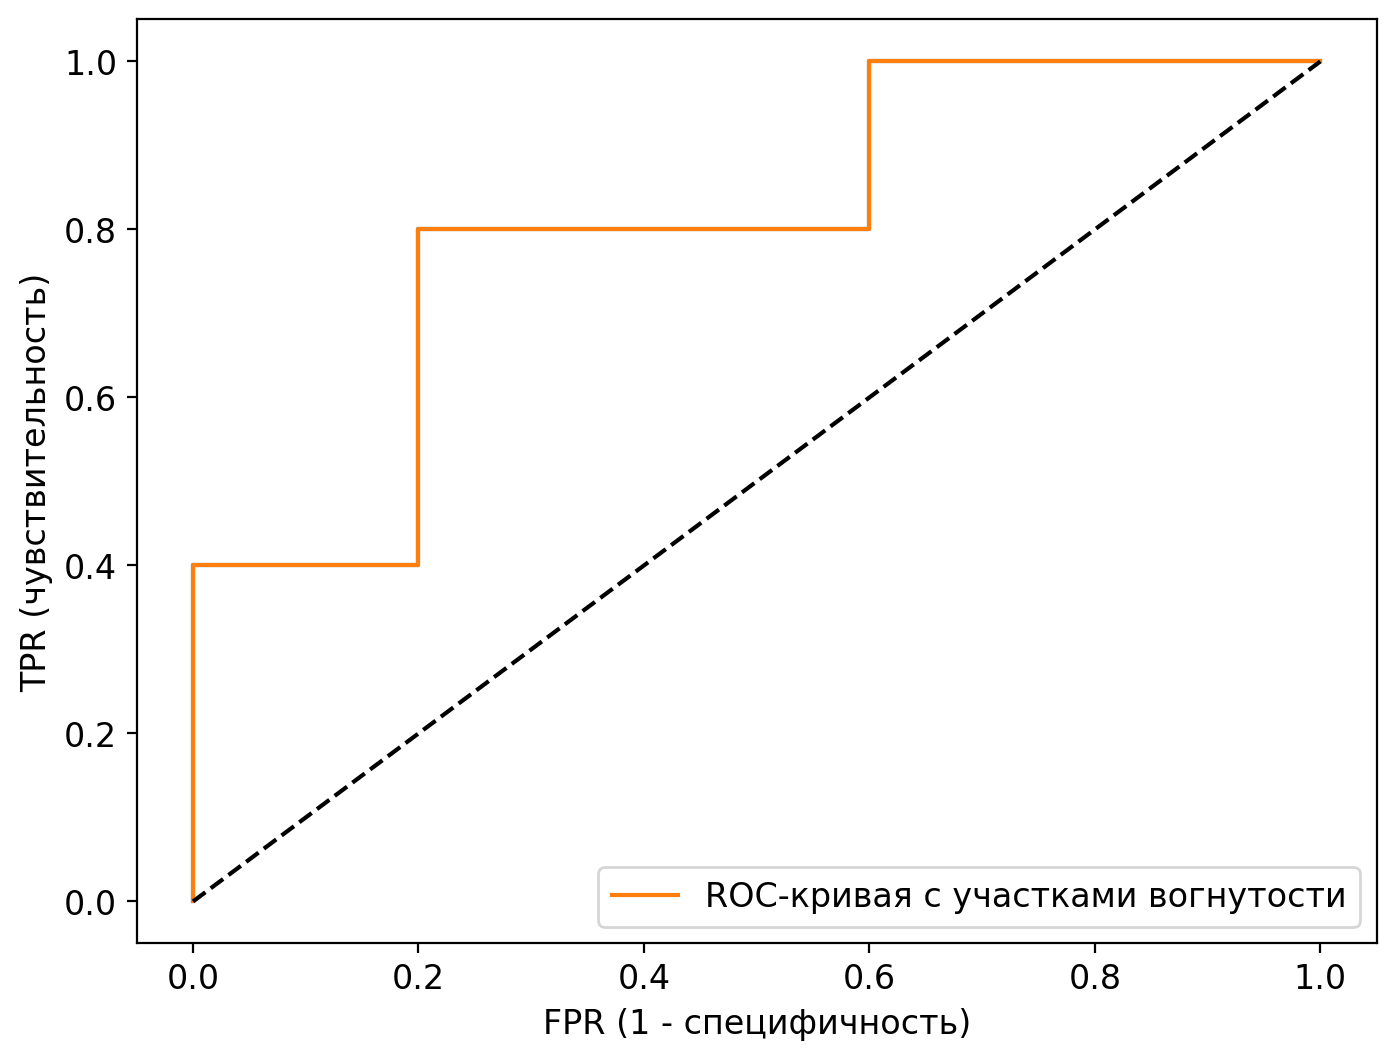

In [86]:
# строим ROC-кривую с участками вогнутости
fpr, tpr, thresholds = roc_curve(cl, pr)
plt.plot(fpr, tpr)
plt.xlabel("FPR (1 - специфичность)")
plt.ylabel("TPR (чувствительность)")
string = "ROC-кривая с участками вогнутости"
plt.plot(fpr, tpr, label=string)
plt.plot([0, 1], [0, 1], "k--")
plt.legend(loc=4);

In [87]:
# меняем вероятности, "ремонтируя" ROC-кривую
pr = np.array([0.9, 0.8, 0.6, 0.6, 0.6, 
               0.3, 0.3, 0.3, 0.1, 0.05])
roc_auc_score(cl, pr)

0.88

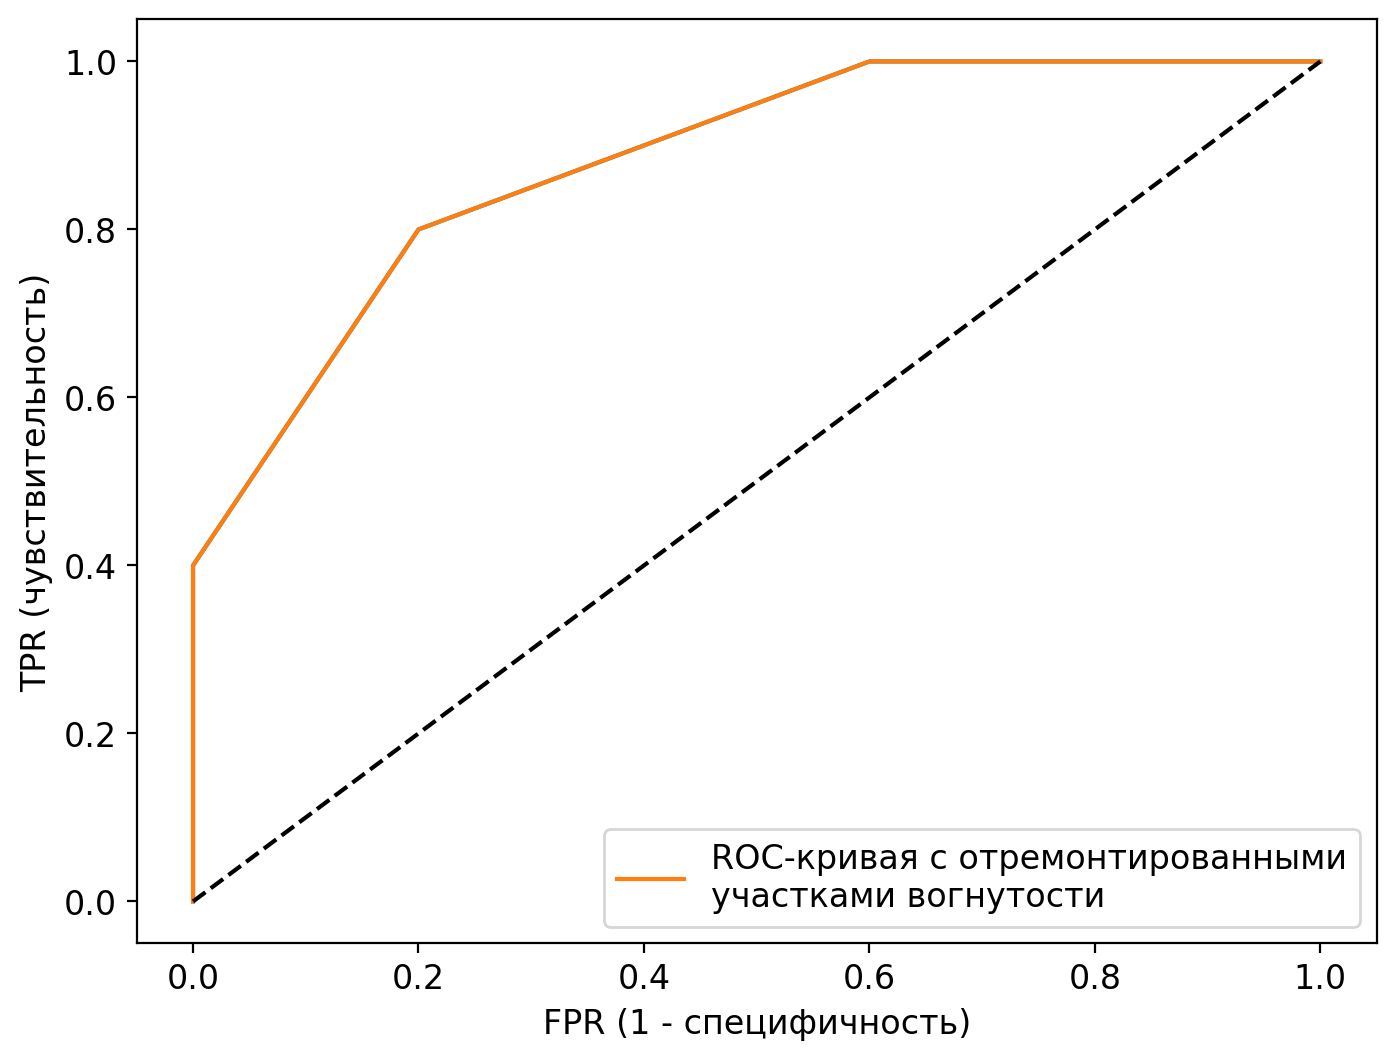

In [88]:
# строим ROC-кривую с отремонтированными
# участками вогнутости
fpr, tpr, thresholds = roc_curve(cl, pr)
plt.plot(fpr, tpr)
plt.xlabel("FPR (1 - специфичность)")
plt.ylabel("TPR (чувствительность)")
string = ("ROC-кривая с отремонтированными\n" + 
          "участками вогнутости")
plt.plot(fpr, tpr, label=string)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4);

In [89]:
# импортируем необходимые классы и функции
from sklearn.preprocessing import (LabelEncoder,
                                   label_binarize)
from sklearn.linear_model import LogisticRegression
from itertools import combinations

In [90]:
# создаем игрушечные данные
X_trn = np.array([[4.2, 1.5],
                  [1.4, 2.1],
                  [3.1, 0.5],
                  [1.3, 2.2],
                  [6.9, 4.5],
                  [7.9, 7.1]])

y_trn = np.array(['apple', 'pear', 'apple', 
                  'orange', 'pear', 'apple'])

In [91]:
# строковые метки преобразовываем в целочисленные
le = LabelEncoder()
y_trn = le.fit_transform(y_trn)
y_trn

array([0, 2, 0, 1, 2, 0])

In [92]:
# создаем и обучаем модель логистической регрессии
logreg = LogisticRegression()
logreg.fit(X_trn, y_trn);

In [93]:
# получаем вероятности классов
proba = logreg.predict_proba(X_trn)
proba

array([[0.68374283, 0.05426589, 0.26199129],
       [0.21630564, 0.39917286, 0.3845215 ],
       [0.63632408, 0.09994339, 0.26373253],
       [0.19683739, 0.42100499, 0.38215762],
       [0.70556819, 0.01338598, 0.28104583],
       [0.56121542, 0.01220895, 0.42657563]])

In [94]:
# вычисляем AUC-ROC по схеме one-vs-rest
# с average='macro'
logreg_roc_auc = roc_auc_score(
    y_trn, 
    logreg.predict_proba(X_trn), 
    multi_class='ovr', average='macro')
print("AUC-ROC: {:.3f}".format(logreg_roc_auc))

AUC-ROC: 0.764


In [95]:
# получаем уникальные метки классов
classes = np.unique(y_trn)
classes

array([0, 1, 2])

In [96]:
# вычисляем количество классов
n_classes = len(classes)
n_classes

3

In [97]:
# бинаризируем массив меток
y_trn_binarized = label_binarize(y_trn, classes=classes)
y_trn_binarized

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [98]:
# создаем массив auc_scores из нулей с количеством элементов, 
# равным количеству классов, в него будем записывать
# оценки AUC-ROC моделей
auc_scores = np.zeros((n_classes,))

# для каждого класса...
for c in range(n_classes):
    # записываем метки
    y_true_c = y_trn_binarized[:, c]
    print(f"фактические метки классов:\n{y_true_c}")
    # записываем вероятности
    y_score_c = proba[:, c]
    print(f"вероятности положительного класса (класса {c}):\n{y_score_c}")
    print("")
    # вычисляем AUC-ROC и записываем в массив auc_scores 
    auc_scores[c] = roc_auc_score(y_true_c, y_score_c, sample_weight=None)   

фактические метки классов:
[1 0 1 0 0 1]
вероятности положительного класса (класса 0):
[0.68374283 0.21630564 0.63632408 0.19683739 0.70556819 0.56121542]

фактические метки классов:
[0 0 0 1 0 0]
вероятности положительного класса (класса 1):
[0.05426589 0.39917286 0.09994339 0.42100499 0.01338598 0.01220895]

фактические метки классов:
[0 1 0 0 1 0]
вероятности положительного класса (класса 2):
[0.26199129 0.3845215  0.26373253 0.38215762 0.28104583 0.42657563]



In [99]:
# смотрим оценки AUC-ROC
print(f"оценки AUC-ROC: {auc_scores}")
# усредняем оценки
ovr_macro_average_auc_score = np.mean(auc_scores)
print(f"итоговая оценка AUC-ROC: {ovr_macro_average_auc_score: .3f}")

оценки AUC-ROC: [0.66666667 1.         0.625     ]
итоговая оценка AUC-ROC:  0.764


In [100]:
# вычисляем AUC-ROC по схеме one-vs-rest
# с average='weighted'
logreg_roc_auc = roc_auc_score(
    y_trn, 
    logreg.predict_proba(X_trn), 
    multi_class='ovr', average='weighted')
print("AUC-ROC: {:.3f}".format(logreg_roc_auc))

AUC-ROC: 0.708


In [101]:
# вычисляем вес каждого класса как количество наблюдений
# положительного класса в соответствующем столбце
# бинаризованного массива меток
average_weight = np.sum(y_trn_binarized, axis=0)
print(f"веса классов: {average_weight}")
print("")

веса классов: [3 1 2]



In [102]:
# создаем массив auc_scores из нулей с количеством элементов, 
# равным количеству классов, в него будем записывать
# оценки AUC-ROC моделей
auc_scores = np.zeros((n_classes,))

# для каждого класса...
for c in range(n_classes):
    # записываем метки
    y_true_c = y_trn_binarized[:, c]
    print(f"фактические метки классов:\n{y_true_c}")
    # записываем вероятности
    y_score_c = proba[:, c]
    print(f"вероятности положительного класса (класса {c}):\n{y_score_c}")
    print("")
    # вычисляем AUC-ROC и записываем в массив auc_scores 
    auc_scores[c] = roc_auc_score(y_true_c, y_score_c, sample_weight=None)   

фактические метки классов:
[1 0 1 0 0 1]
вероятности положительного класса (класса 0):
[0.68374283 0.21630564 0.63632408 0.19683739 0.70556819 0.56121542]

фактические метки классов:
[0 0 0 1 0 0]
вероятности положительного класса (класса 1):
[0.05426589 0.39917286 0.09994339 0.42100499 0.01338598 0.01220895]

фактические метки классов:
[0 1 0 0 1 0]
вероятности положительного класса (класса 2):
[0.26199129 0.3845215  0.26373253 0.38215762 0.28104583 0.42657563]



In [103]:
# смотрим оценки AUC-ROC
print(f"оценки AUC-ROC: {auc_scores}")
# усредняем оценки с учетом весов классов
ovr_weighted_average_auc_score = np.average(auc_scores, 
                                            weights=average_weight)
print(f"итоговая оценка AUC-ROC: {ovr_weighted_average_auc_score: .3f}")

оценки AUC-ROC: [0.66666667 1.         0.625     ]
итоговая оценка AUC-ROC:  0.708


In [104]:
# под капотом np.average(auc_scores, weights=average_weight)
# происходит следующее
ovr_weighted_average_auc_score_alter = (
    average_weight[0] * auc_scores[0] + 
    average_weight[1] * auc_scores[1] +
    average_weight[2] * auc_scores[2]) / sum(average_weight)
print(f"итоговая оценка AUC-ROC: {ovr_weighted_average_auc_score_alter: .3f}")

итоговая оценка AUC-ROC:  0.708


In [105]:
# задаем веса наблюдений
obs_weights = [1, 2, 1, 2, 1, 3]

In [106]:
# вычисляем AUC-ROC по схеме one-vs-rest
# с average='weighted' и весами наблюдений
logreg_roc_auc = roc_auc_score(
    y_trn, 
    logreg.predict_proba(X_trn), 
    multi_class='ovr', average='weighted', 
    sample_weight=obs_weights)
print("AUC-ROC: {:.3f}".format(logreg_roc_auc))

AUC-ROC: 0.743


In [107]:
# меняем форму массива весов
obs_weights_reshaped = np.reshape(obs_weights, (-1, 1))
obs_weights_reshaped

array([[1],
       [2],
       [1],
       [2],
       [1],
       [3]])

In [108]:
# умножаем значения бинаризованного массива меток на веса
obs_weights_reshaped = np.multiply(y_trn_binarized, 
                                   obs_weights_reshaped)
obs_weights_reshaped 

array([[1, 0, 0],
       [0, 0, 2],
       [1, 0, 0],
       [0, 2, 0],
       [0, 0, 1],
       [3, 0, 0]])

In [109]:
# вычисляем вес каждого класса как сумму взвешенных
# наблюдений положительного класса 
# в соответствующем столбце
average_weight = np.sum(obs_weights_reshaped, axis=0)
print(f"веса классов: {average_weight}")

веса классов: [5 2 3]


In [110]:
# создаем массив auc_scores из нулей с количеством элементов, 
# равным количеству классов, в него будем записывать
# оценки AUC-ROC моделей
auc_scores = np.zeros((n_classes,))

for c in range(n_classes):
    y_true_c = y_trn_binarized[:, c]
    print(f"фактические метки классов:\n{y_true_c}")
    y_score_c = proba[:, c]
    print(f"вероятности положительного класса (класса {c}):\n{y_score_c}")
    print("")
    auc_scores[c] = roc_auc_score(
        y_true_c, y_score_c, sample_weight=obs_weights)   

фактические метки классов:
[1 0 1 0 0 1]
вероятности положительного класса (класса 0):
[0.68374283 0.21630564 0.63632408 0.19683739 0.70556819 0.56121542]

фактические метки классов:
[0 0 0 1 0 0]
вероятности положительного класса (класса 1):
[0.05426589 0.39917286 0.09994339 0.42100499 0.01338598 0.01220895]

фактические метки классов:
[0 1 0 0 1 0]
вероятности положительного класса (класса 2):
[0.26199129 0.3845215  0.26373253 0.38215762 0.28104583 0.42657563]



In [111]:
# смотрим оценки AUC-ROC
print(f"оценки AUC: {auc_scores}")
# усредняем оценки с учетом весов классов
ovr_cust_weighted_average_auc_score = np.average(
    auc_scores, weights=average_weight)
print(f"итоговая оценка AUC: {ovr_cust_weighted_average_auc_score: .3f}")

оценки AUC: [0.8        1.         0.47619048]
итоговая оценка AUC:  0.743


In [112]:
# вычисляем AUC-ROC по схеме one-vs-one
# с average='macro'
logreg_roc_auc = roc_auc_score(
    y_trn, 
    logreg.predict_proba(X_trn), 
    multi_class='ovo', average='macro')
print("AUC: {:.3f}".format(logreg_roc_auc))

AUC: 0.778


In [113]:
# записываем количество пар классов
n_pairs = n_classes * (n_classes - 1) // 2
n_pairs

3

In [114]:
# создаем массив pair_auc_scores из нулей с количеством
# элементов, равным количеству пар, в него будем
# записывать средние оценки AUC-ROC для пар
pair_auc_scores = np.zeros(n_pairs)

# вычисляем среднее значение AUC-ROC 
# для каждой пары классов вида A-B,
# сначала вычисляем AUC-ROC, объявив класс A 
# положительным, а класс B - отрицательным,
# затем вычисляем AUC-ROC, объявив класс B
# положительным, а класс A - отрицательным
for ix, (a, b) in enumerate(combinations(classes, 2)):
    a_mask = y_trn == a
    b_mask = y_trn == b
    ab_mask = np.logical_or(a_mask, b_mask)

    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]
    
    print(f"сравниваем класс {a} с классом {b}")
    a_true_auc_score = roc_auc_score(a_true, proba[ab_mask, a])
    print(f"метки классов, когда класс {a} -\n"
          f"положительный класс:\n{a_true}")
    print(f"вероятности для класса {a}:\n{proba[ab_mask, a]}")
    print(f"AUC-ROC, когда класс {a} - положительный класс: {a_true_auc_score}")
    print("")
    b_true_auc_score = roc_auc_score(b_true, proba[ab_mask, b])
    print(f"метки классов, когда класс {b} -\n"
          f"положительный класс:\n{b_true}")
    print(f"вероятности для класса {b}:\n{proba[ab_mask, b]}")
    print(f"AUC-ROC, когда класс {b} - положительный класс: {b_true_auc_score}\n")
    pair_auc_scores[ix] = (a_true_auc_score + b_true_auc_score) / 2
    print(f"усредненная оценка AUC-ROC для пары: {pair_auc_scores[ix]}")
    print("---------------------------------------------")

сравниваем класс 0 с классом 1
метки классов, когда класс 0 -
положительный класс:
[ True  True False  True]
вероятности для класса 0:
[0.68374283 0.63632408 0.19683739 0.56121542]
AUC-ROC, когда класс 0 - положительный класс: 1.0

метки классов, когда класс 1 -
положительный класс:
[False False  True False]
вероятности для класса 1:
[0.05426589 0.09994339 0.42100499 0.01220895]
AUC-ROC, когда класс 1 - положительный класс: 1.0

усредненная оценка AUC-ROC для пары: 1.0
---------------------------------------------
сравниваем класс 0 с классом 2
метки классов, когда класс 0 -
положительный класс:
[ True False  True False  True]
вероятности для класса 0:
[0.68374283 0.21630564 0.63632408 0.70556819 0.56121542]
AUC-ROC, когда класс 0 - положительный класс: 0.5

метки классов, когда класс 2 -
положительный класс:
[False  True False  True False]
вероятности для класса 2:
[0.26199129 0.3845215  0.26373253 0.28104583 0.42657563]
AUC-ROC, когда класс 2 - положительный класс: 0.6666666666666667

In [115]:
# смотрим массив со средними оценками AUC-ROC для пар
print(f"усредненные оценки AUC-ROC для пар: {pair_auc_scores}")
# усредняем средние оценки AUC-ROC для пар
ovo_macro_average_auc_score = np.average(pair_auc_scores, 
                                         weights=None)
print(f"итоговая оценка AUC-ROC: {ovo_macro_average_auc_score: .3f}")

усредненные оценки AUC-ROC для пар: [1.         0.58333333 0.75      ]
итоговая оценка AUC-ROC:  0.778


In [116]:
# вычисляем AUC-ROC по схеме one-vs-one
# с average='weighted'
logreg_roc_auc = roc_auc_score(
    y_trn, 
    logreg.predict_proba(X_trn), 
    multi_class='ovo', average='weighted')
print("AUC: {:.3f}".format(logreg_roc_auc))

AUC: 0.764


In [117]:
# создаем массив prevalence с количеством элементов,
# равным количеству классов, в него будем
# записывать веса пар
prevalence = np.zeros(n_pairs)

In [118]:
# создаем массив pair_auc_scores из нулей с количеством
# элементов, равным количеству пар, в него будем
# записывать средние оценки AUC-ROC для пар
pair_auc_scores = np.zeros(n_pairs)

# вычисляем среднее значение AUC-ROC 
# для каждой пары классов вида A-B,
# сначала вычисляем AUC-ROC, объявив класс A 
# положительным, а класс B - отрицательным,
# затем вычисляем AUC-ROC, объявив класс B
# положительным, а класс A - отрицательным
for ix, (a, b) in enumerate(combinations(classes, 2)):
    a_mask = y_trn == a
    b_mask = y_trn == b
    ab_mask = np.logical_or(a_mask, b_mask)
    
    # получаем вес пары, вес - это среднее, взятое 
    # по положительным наблюдениям (наблюдениям с меткой 1)
    # в соответствующем столбце бинаризованного массива меток,
    # к положительным наблюдениям причисляем наблюдения,
    # принадлежащие сравниваемым классам в паре,
    # к отрицательным - наблюдения остальных классов
    prevalence[ix] = np.average(ab_mask)
    
    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]

    print(f"сравниваем класс {a} с классом {b}")
    print(f"вес пары {a} vs {b}: {prevalence[ix]}\n")
    a_true_auc_score = roc_auc_score(a_true, proba[ab_mask, a])
    print(f"метки классов, когда класс {a} -\n"
          f"положительный класс:\n{a_true}")
    print(f"вероятности для класса {a}:\n{proba[ab_mask, a]}")
    print(f"AUC-ROC, когда класс {a} - положительный класс: {a_true_auc_score}")
    print("")
    b_true_auc_score = roc_auc_score(b_true, proba[ab_mask, b])
    print(f"метки классов, когда класс {b} -\n"
          f"положительный класс:\n{b_true}")
    print(f"вероятности для класса {b}:\n{proba[ab_mask, b]}")
    print(f"AUC-ROC, когда класс {b} - положительный класс: {b_true_auc_score}\n")
    pair_auc_scores[ix] = (a_true_auc_score + b_true_auc_score) / 2
    print(f"усредненная оценка AUC-ROC для пары: {pair_auc_scores[ix]}")
    print("---------------------------------------------")

сравниваем класс 0 с классом 1
вес пары 0 vs 1: 0.6666666666666666

метки классов, когда класс 0 -
положительный класс:
[ True  True False  True]
вероятности для класса 0:
[0.68374283 0.63632408 0.19683739 0.56121542]
AUC-ROC, когда класс 0 - положительный класс: 1.0

метки классов, когда класс 1 -
положительный класс:
[False False  True False]
вероятности для класса 1:
[0.05426589 0.09994339 0.42100499 0.01220895]
AUC-ROC, когда класс 1 - положительный класс: 1.0

усредненная оценка AUC-ROC для пары: 1.0
---------------------------------------------
сравниваем класс 0 с классом 2
вес пары 0 vs 2: 0.8333333333333334

метки классов, когда класс 0 -
положительный класс:
[ True False  True False  True]
вероятности для класса 0:
[0.68374283 0.21630564 0.63632408 0.70556819 0.56121542]
AUC-ROC, когда класс 0 - положительный класс: 0.5

метки классов, когда класс 2 -
положительный класс:
[False  True False  True False]
вероятности для класса 2:
[0.26199129 0.3845215  0.26373253 0.28104583 0.

In [119]:
# смотрим веса пар
print(f"веса пар: {prevalence}")
# смотрим массив со средними оценками AUC-ROC для пар
print(f"усредненные оценки AUC-ROC для пар: {pair_auc_scores}")
# усредняем средние оценки AUC-ROC для пар
ovo_weighted_average_auc_score = np.average(pair_auc_scores, 
                                            weights=prevalence)
print(f"итоговая оценка AUC-ROC: {ovo_weighted_average_auc_score: .3f}")

веса пар: [0.66666667 0.83333333 0.5       ]
усредненные оценки AUC-ROC для пар: [1.         0.58333333 0.75      ]
итоговая оценка AUC-ROC:  0.764


## 1.15. PR-кривая (PR curve) и площадь под PR-кривой (AUC-PR)

In [120]:
# пишем функцию, которая будет строить PR-кривую
def _precision_recall_curve(y_true, y_score, sample_weight=None):
    """
    Вычисляет пары значений точности и полноты для каждого
    порогового значения вероятности положительного класса.
    
    Параметры
    ----------
    y_true : одномерный массив формы [n_samples]
        Фактические метки (классы) зависимой переменной.

    y_score : одномерный массив формы [n_samples]
        Спрогнозированные вероятности положительного класса.

    sample_weight : одномерный массив формы (n_samples,), 
                    по умолчанию None
        Веса наблюдений.

    Возвращает
    -------
    precision : одномерный массив        
        Значения точности.

    recall : одномерный массив
        Значения полноты (чувствительности).

    thresholds : одномерный массив
        Пороговые значения спрогнозированной вероятности
        положительного класса, отсортированные по возрастанию.
    """
    # вычисляем количество истинно положительных случаев 
    # для каждого порога, количество ложноположительных 
    # случаев для каждого порога, пороги
    fps, tps, thresholds = _binary_clf_curve(
        y_true, y_score, sample_weight=sample_weight
    )

    # вычисляем общее количество предсказанных
    # положительных случаев
    ps = tps + fps
    # вычисляем точность
    precision = np.divide(tps, ps, where=(ps != 0))
    
    # вычисляем полноту,
    # когда в y_true нет меток положительного класса, 
    # полнота задается равной 1 для всех порогов
    # tps[-1] == 0 <=> y_true == all negative labels
    if tps[-1] == 0:
        warnings.warn(
            "Положительный класс не найден в y_true, "
            "recall приравнивается к 1 для всех порогов."
        )
        recall = np.ones_like(tps)
    else:
        recall = tps / tps[-1]

    # меняем порядок, потому что полнота уменьшается
    sl = slice(None, None, -1)
    return (np.hstack((precision[sl], 1)), 
            np.hstack((recall[sl], 0)), 
            thresholds[sl])

In [121]:
# создаем экземпляр класса GradientBoostingClassifier
boost = GradientBoostingClassifier(n_estimators=300, 
                                   learning_rate=0.01, 
                                   max_depth=8, 
                                   random_state=42)
# обучаем модель
boost.fit(X_train, y_train)
# получаем вероятности положительного класса 
# для тестовой выборки
proba = boost.predict_proba(X_test)[:, 1]

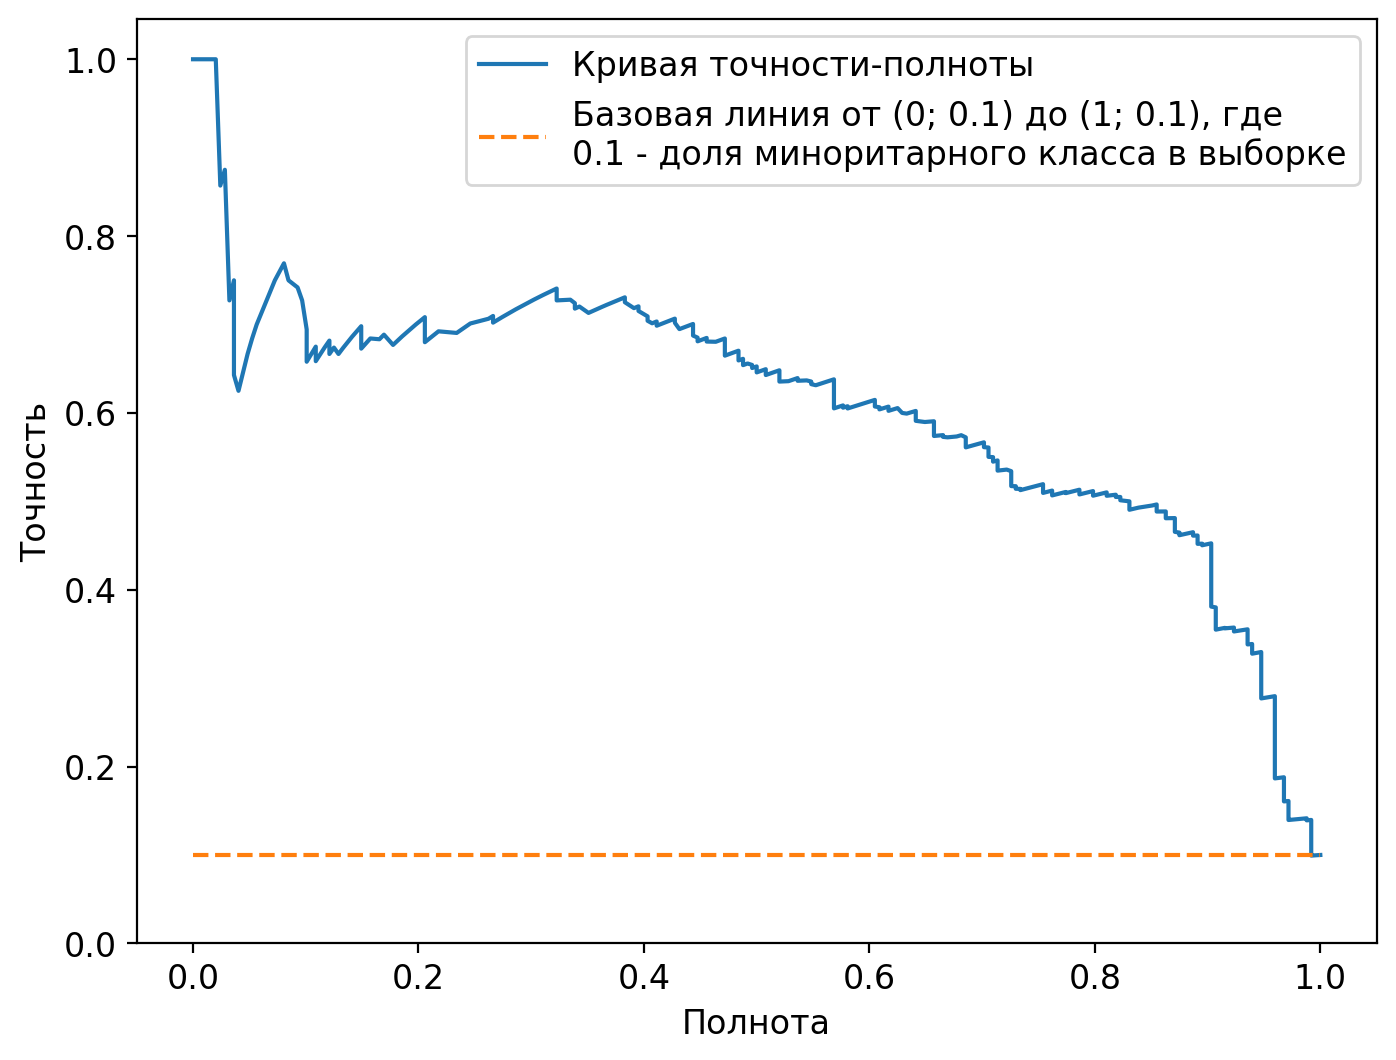

In [122]:
# вычисляем значения точности и полноты для всех возможных 
# порогов отсечения, передав нашей функции _precision_recall_curve() 
# в качестве аргументов фактические значения зависимой 
# переменной и вероятности
precision, recall, thresholds = _precision_recall_curve(
    y_test.values, proba, sample_weight=None)

# строим график кривой точности-полноты
fig, ax = plt.subplots(figsize=(8, 6))
bsline = round(len(y_test[y_test == 1]) / len(y_test), 1)
label_text = (f"Базовая линия от (0; {bsline}) до (1; {bsline}), где\n"
              f"{bsline} - доля миноритарного класса в выборке")
ax.plot(recall, precision, label="Кривая точности-полноты")
ax.plot([0, 1], [bsline, bsline],
        linestyle="--", 
        label=label_text)
ax.set_ylim(ymin=0)
ax.set_xlabel("Полнота")
ax.set_ylabel("Точность")
plt.legend(loc="best");

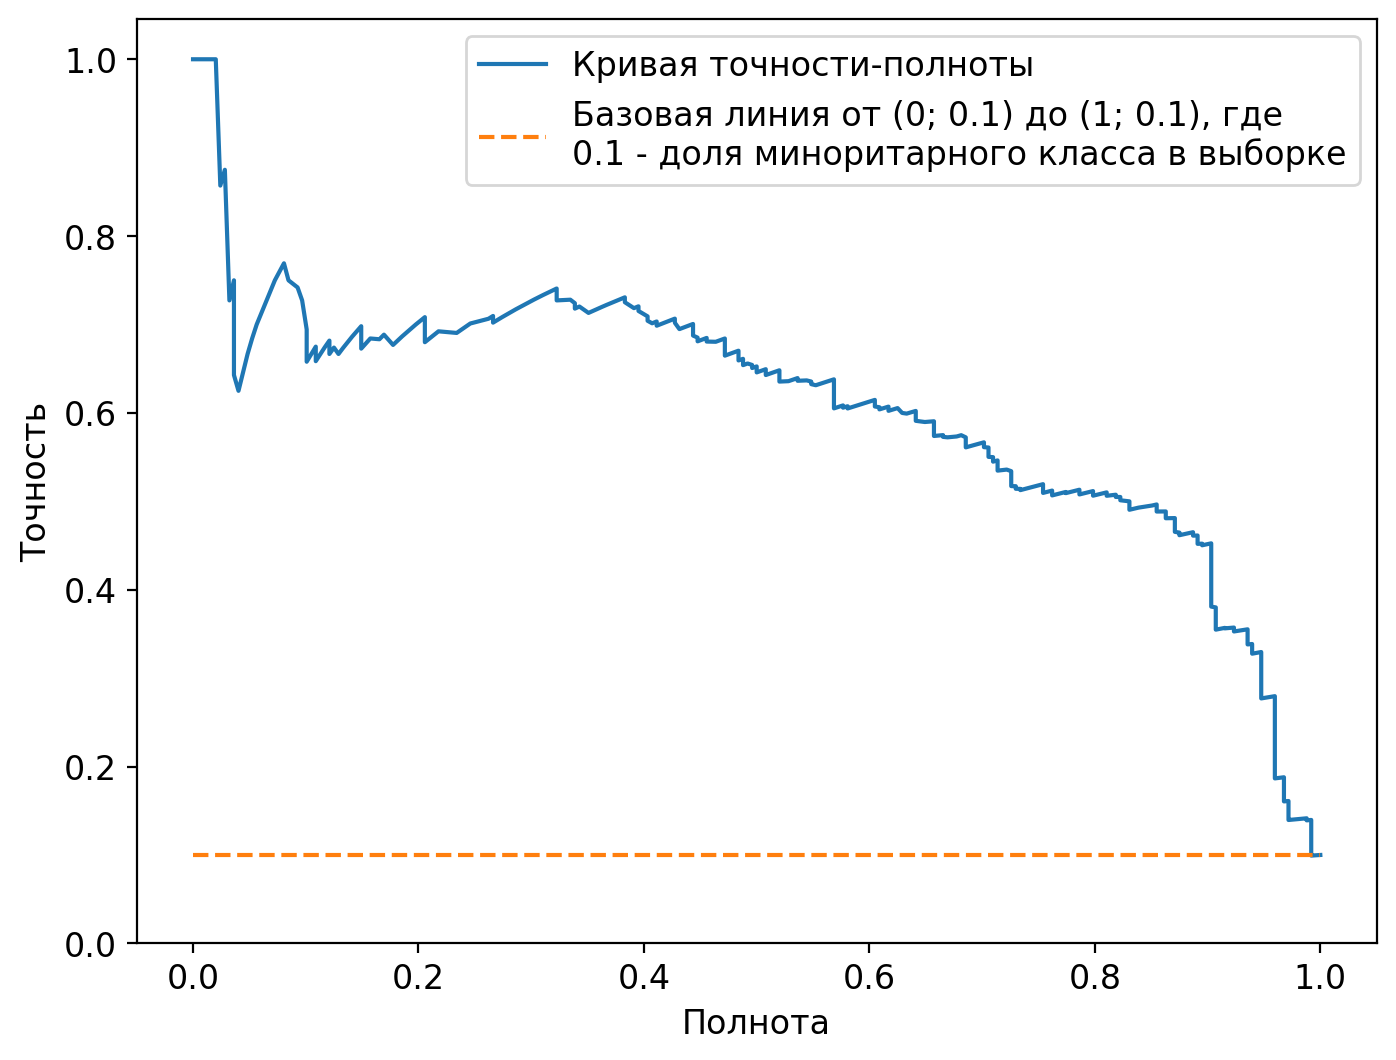

In [123]:
# из модуля sklearn.metrics импортируем 
# функцию precision_recall_curve()
from sklearn.metrics import precision_recall_curve

# вычисляем значения точности и полноты для всех возможных 
# порогов отсечения, передав функции precision_recall_curve() 
# в качестве аргументов фактические значения зависимой 
# переменной и вероятности
precision, recall, thresholds = precision_recall_curve(
    y_test, proba)

# строим график кривой точности-полноты
fig, ax = plt.subplots(figsize=(8, 6))
bsline = round(len(y_test[y_test == 1]) / len(y_test), 1)
label_text = (f"Базовая линия от (0; {bsline}) до (1; {bsline}), где\n"
              f"{bsline} - доля миноритарного класса в выборке")
ax.plot(recall, precision, label="Кривая точности-полноты")
ax.plot([0, 1], [bsline, bsline],
        linestyle="--", 
        label=label_text)
ax.set_ylim(ymin=0)
ax.set_xlabel("Полнота")
ax.set_ylabel("Точность")
plt.legend(loc="best");

In [124]:
# вычислим долю миноритарного класса в выборке
y_test.value_counts(normalize=True)[1]

0.100040338846309

In [125]:
# импортируем класс DummyClassifier
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='uniform', 
                            random_state=42)
# обучаем бесполезную модель
dummy_clf.fit(X_train, y_train)
# вычисляем вероятности
random_proba = dummy_clf.predict_proba(X_test)[:, 1]
# для случайного угадывания вероятность положительного
# класса будет равна 0.5, поэтому у нас будет
# единственный порог 0.5
threshold = 0.5
# получаем прогнозы согласно порогу
predictions = (random_proba >= threshold)
# вычисляем матрицу ошибок
confusion = confusion_matrix(y_test, predictions)
# вычисляем чувствительность: TP/(TP+FN)
se = confusion[1][1] / (confusion[1][1] + confusion[1][0])
# вычисляем точность
prec = confusion[1][1] / (confusion[1][1] + confusion[0][1])
# печатаем матрицу ошибок
print(f"Матрица ошибок для порога {threshold}:\n{confusion}")
# печатаем распределение классов
neg = y_test.value_counts()[0]
pos = y_test.value_counts()[1]
print(f"Распределение классов: {neg}:{pos}")
# печатаем значение чувствительности
print(f"Чувствительность: {se:.3f}")
# печатаем значение точности
print(f"Точность: {prec:.3f}")

Матрица ошибок для порога 0.5:
[[   0 2231]
 [   0  248]]
Распределение классов: 2231:248
Чувствительность: 1.000
Точность: 0.100


In [126]:
# задаем минимальный порог
mythreshold = round(thresholds[0], 3)
# получаем прогнозы согласно порогу
predictions = (proba >= mythreshold)
# вычисляем матрицу ошибок
confusion = confusion_matrix(y_test, predictions)
# вычисляем чувствительность: TP/(TP+FN)
se = confusion[1][1] / (confusion[1][1] + confusion[1][0])
# вычисляем точность
prec = confusion[1][1] / (confusion[1][1] + confusion[0][1])
# печатаем матрицу ошибок
print(f"Матрица ошибок для порога {mythreshold}:\n{confusion}")
# печатаем распределение классов
neg = y_test.value_counts()[0]
pos = y_test.value_counts()[1]
print(f"Распределение классов: {neg}:{pos}")
# печатаем значение чувствительности
print(f"Чувствительность: {se:.3f}")
# печатаем значение точности
print(f"Точность: {prec:.3f}")

Матрица ошибок для порога 0.008:
[[   0 2231]
 [   0  248]]
Распределение классов: 2231:248
Чувствительность: 1.000
Точность: 0.100


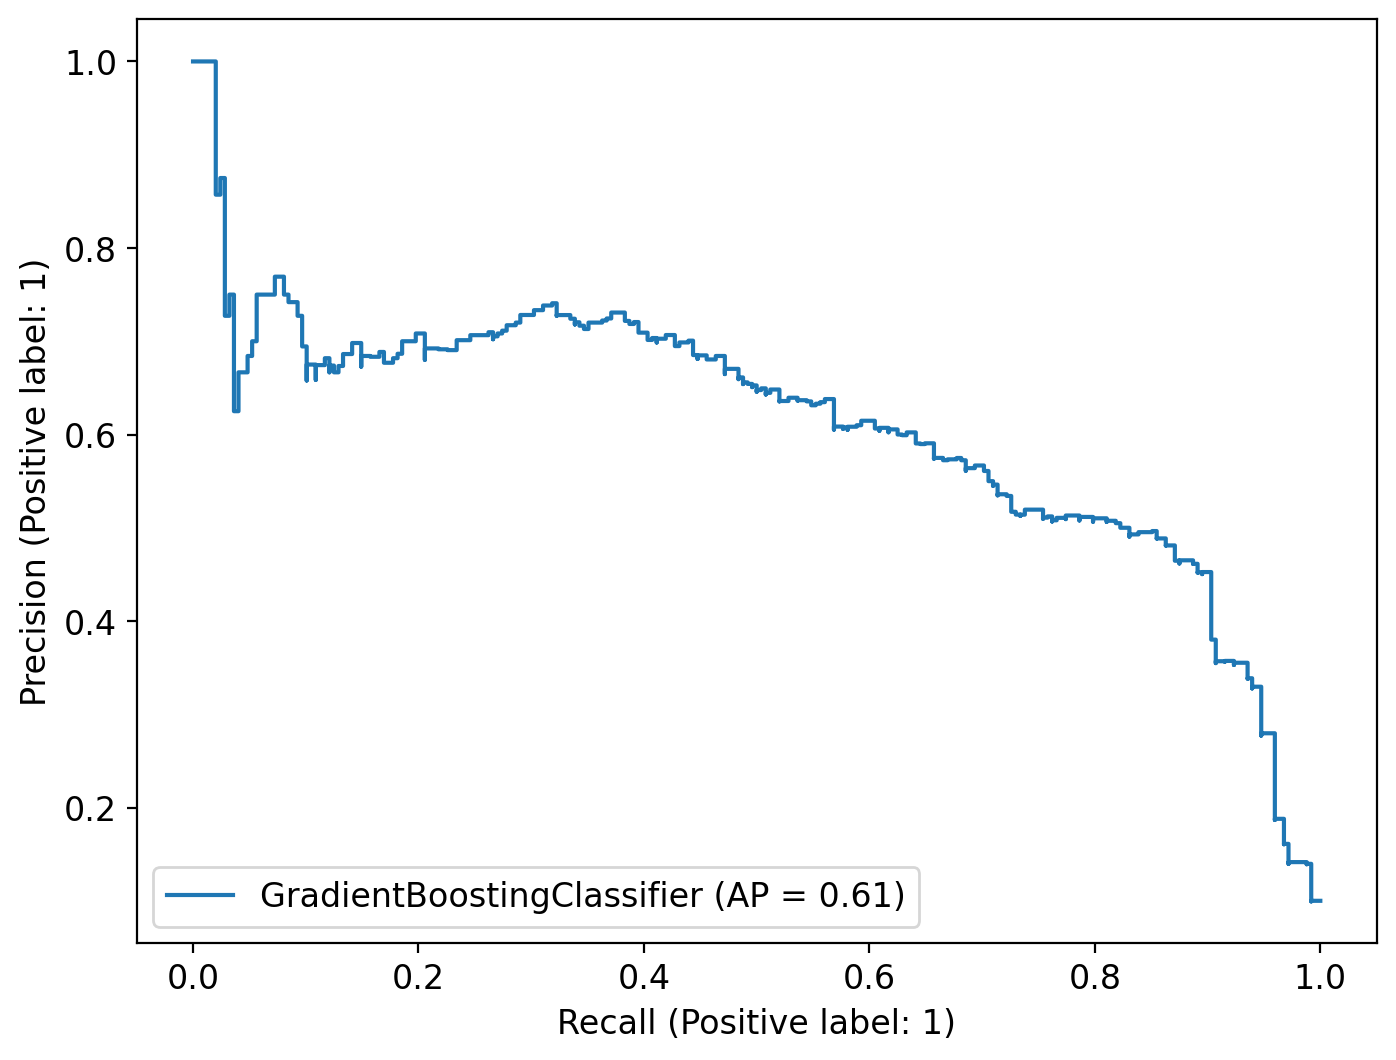

In [127]:
# импортируем класс PrecisionRecallDisplay
from sklearn.metrics import PrecisionRecallDisplay

# строим PR-кривую для модели по умолчанию (без интерполяции)
PrecisionRecallDisplay.from_estimator(boost, X_test, y_test);

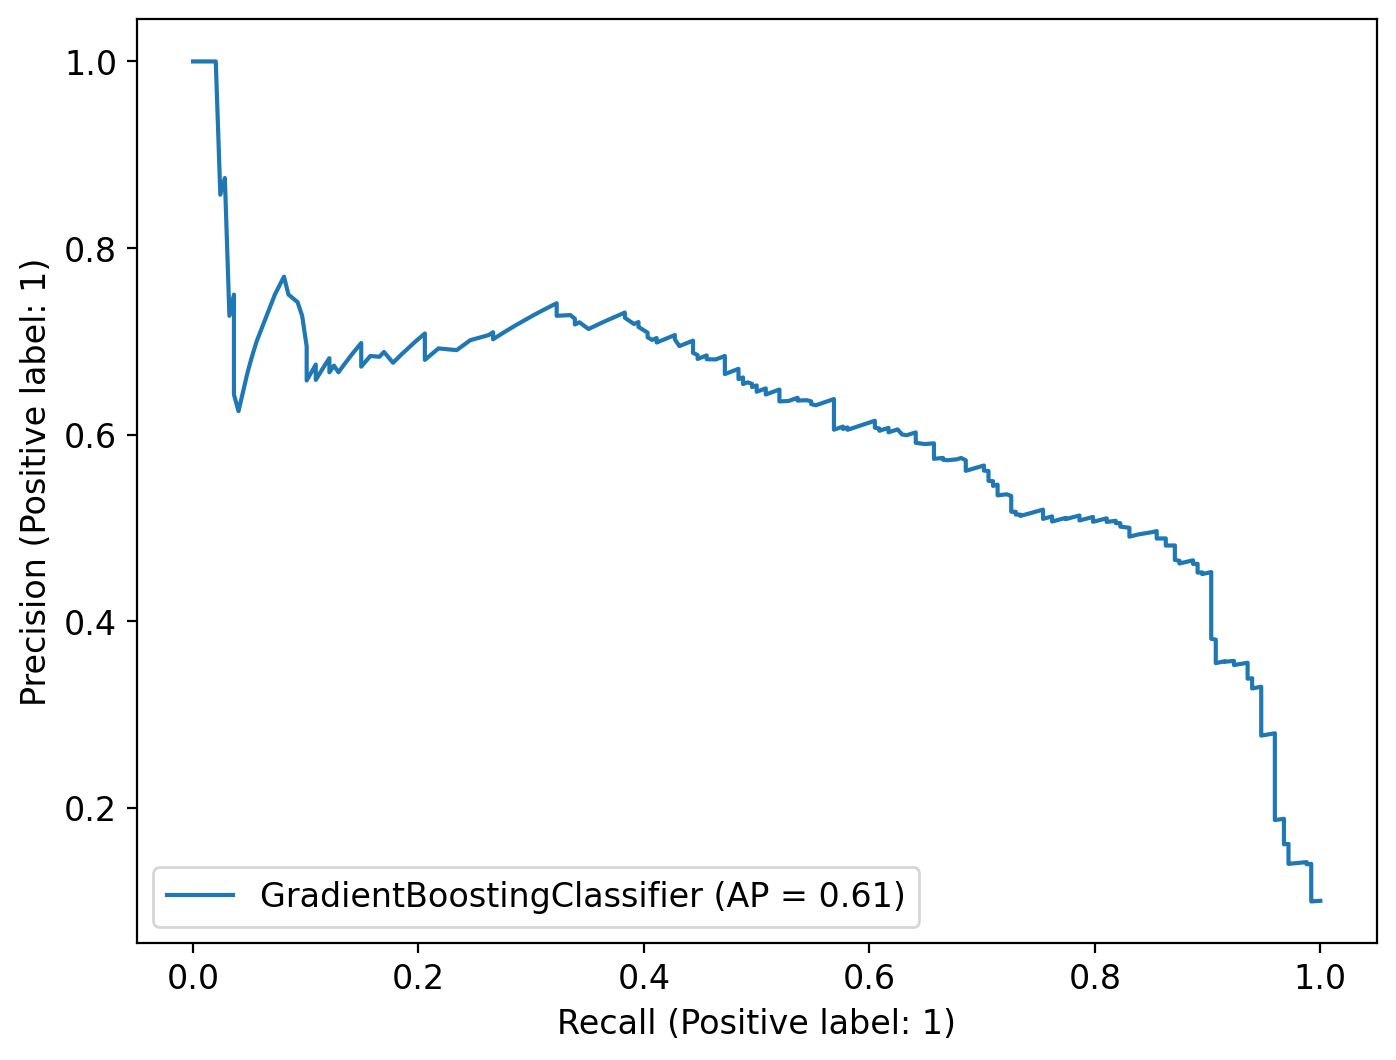

In [128]:
# строим PR-кривую для модели с интерполяцией
PrecisionRecallDisplay.from_estimator(boost, X_test, y_test, 
                                      drawstyle='default');

In [129]:
# импортируем функцию average_precision_score()
from sklearn.metrics import average_precision_score
# вычисляем значение AUC-PR, передав функции 
# average_precision_score() в качестве аргументов 
# фактические значения зависимой переменной и вероятности
aucpr = average_precision_score(y_test, proba)
# печатаем AUC-PR
print("AUC-PR: {:.3f}".format(aucpr))

AUC-PR: 0.608


In [130]:
# импортируем необходимый класс
from sklearn.preprocessing import StandardScaler

In [131]:
# загружаем данные
df = pd.read_csv('Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [132]:
# создаем новую переменную - час суток после полуночи
df['hour'] = df['Time'].apply(
    lambda x: np.ceil(float(x) / 3600) % 24)

In [133]:
# увеличиваем количество отображаемых столбцов
pd.options.display.max_columns = 30
# строим разбивку на легальные/мошеннические 
# транзакции по часам
df.pivot_table(values='Amount', 
               index='Class', 
               columns='hour', 
               aggfunc='count')

hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Class,,,,,,,,,,,,,,,,,,,,,,,,
0,10919,7687,4212,3269,3476,2185,2979,4093,7219,10266,15824,16593,16804,15400,15350,16545,16434,16435,16135,17003,15632,16739,17692,15424
1,21,6,10,57,17,23,11,9,23,9,16,8,53,17,17,23,26,22,29,33,19,18,16,9


In [134]:
print("Мошеннические транзакции составляют {}% от наших данных.".format(
    df['Class'].value_counts(normalize=True)[1] * 100))

Мошеннические транзакции составляют 0.1727485630620034% от наших данных.


In [135]:
# формируем массивы признаков и массивы меток,
# выполняем предварительную подготовку данных
x_train, x_test, y_train, y_test = train_test_split(
    pd.concat([df.loc[:, 'V1':'Amount'], df.loc[:, 'Time']], axis=1), 
    df['Class'], stratify=df['Class'], test_size=0.35, random_state=1)

# выполним стандартизацию
scaler = StandardScaler()
scaler.fit(x_train[['Amount']])
x_train['Amount'] = scaler.transform(x_train[['Amount']])
x_test['Amount'] = scaler.transform(x_test[['Amount']])

# выведем информацию о распределении классов
print(f"Распределение классов в y_train:\n{y_train.value_counts()}")
print("")
print(f"Распределение классов в y_test:\n{y_test.value_counts()}")

Распределение классов в y_train:
0    184804
1       320
Name: Class, dtype: int64

Распределение классов в y_test:
0    99511
1      172
Name: Class, dtype: int64


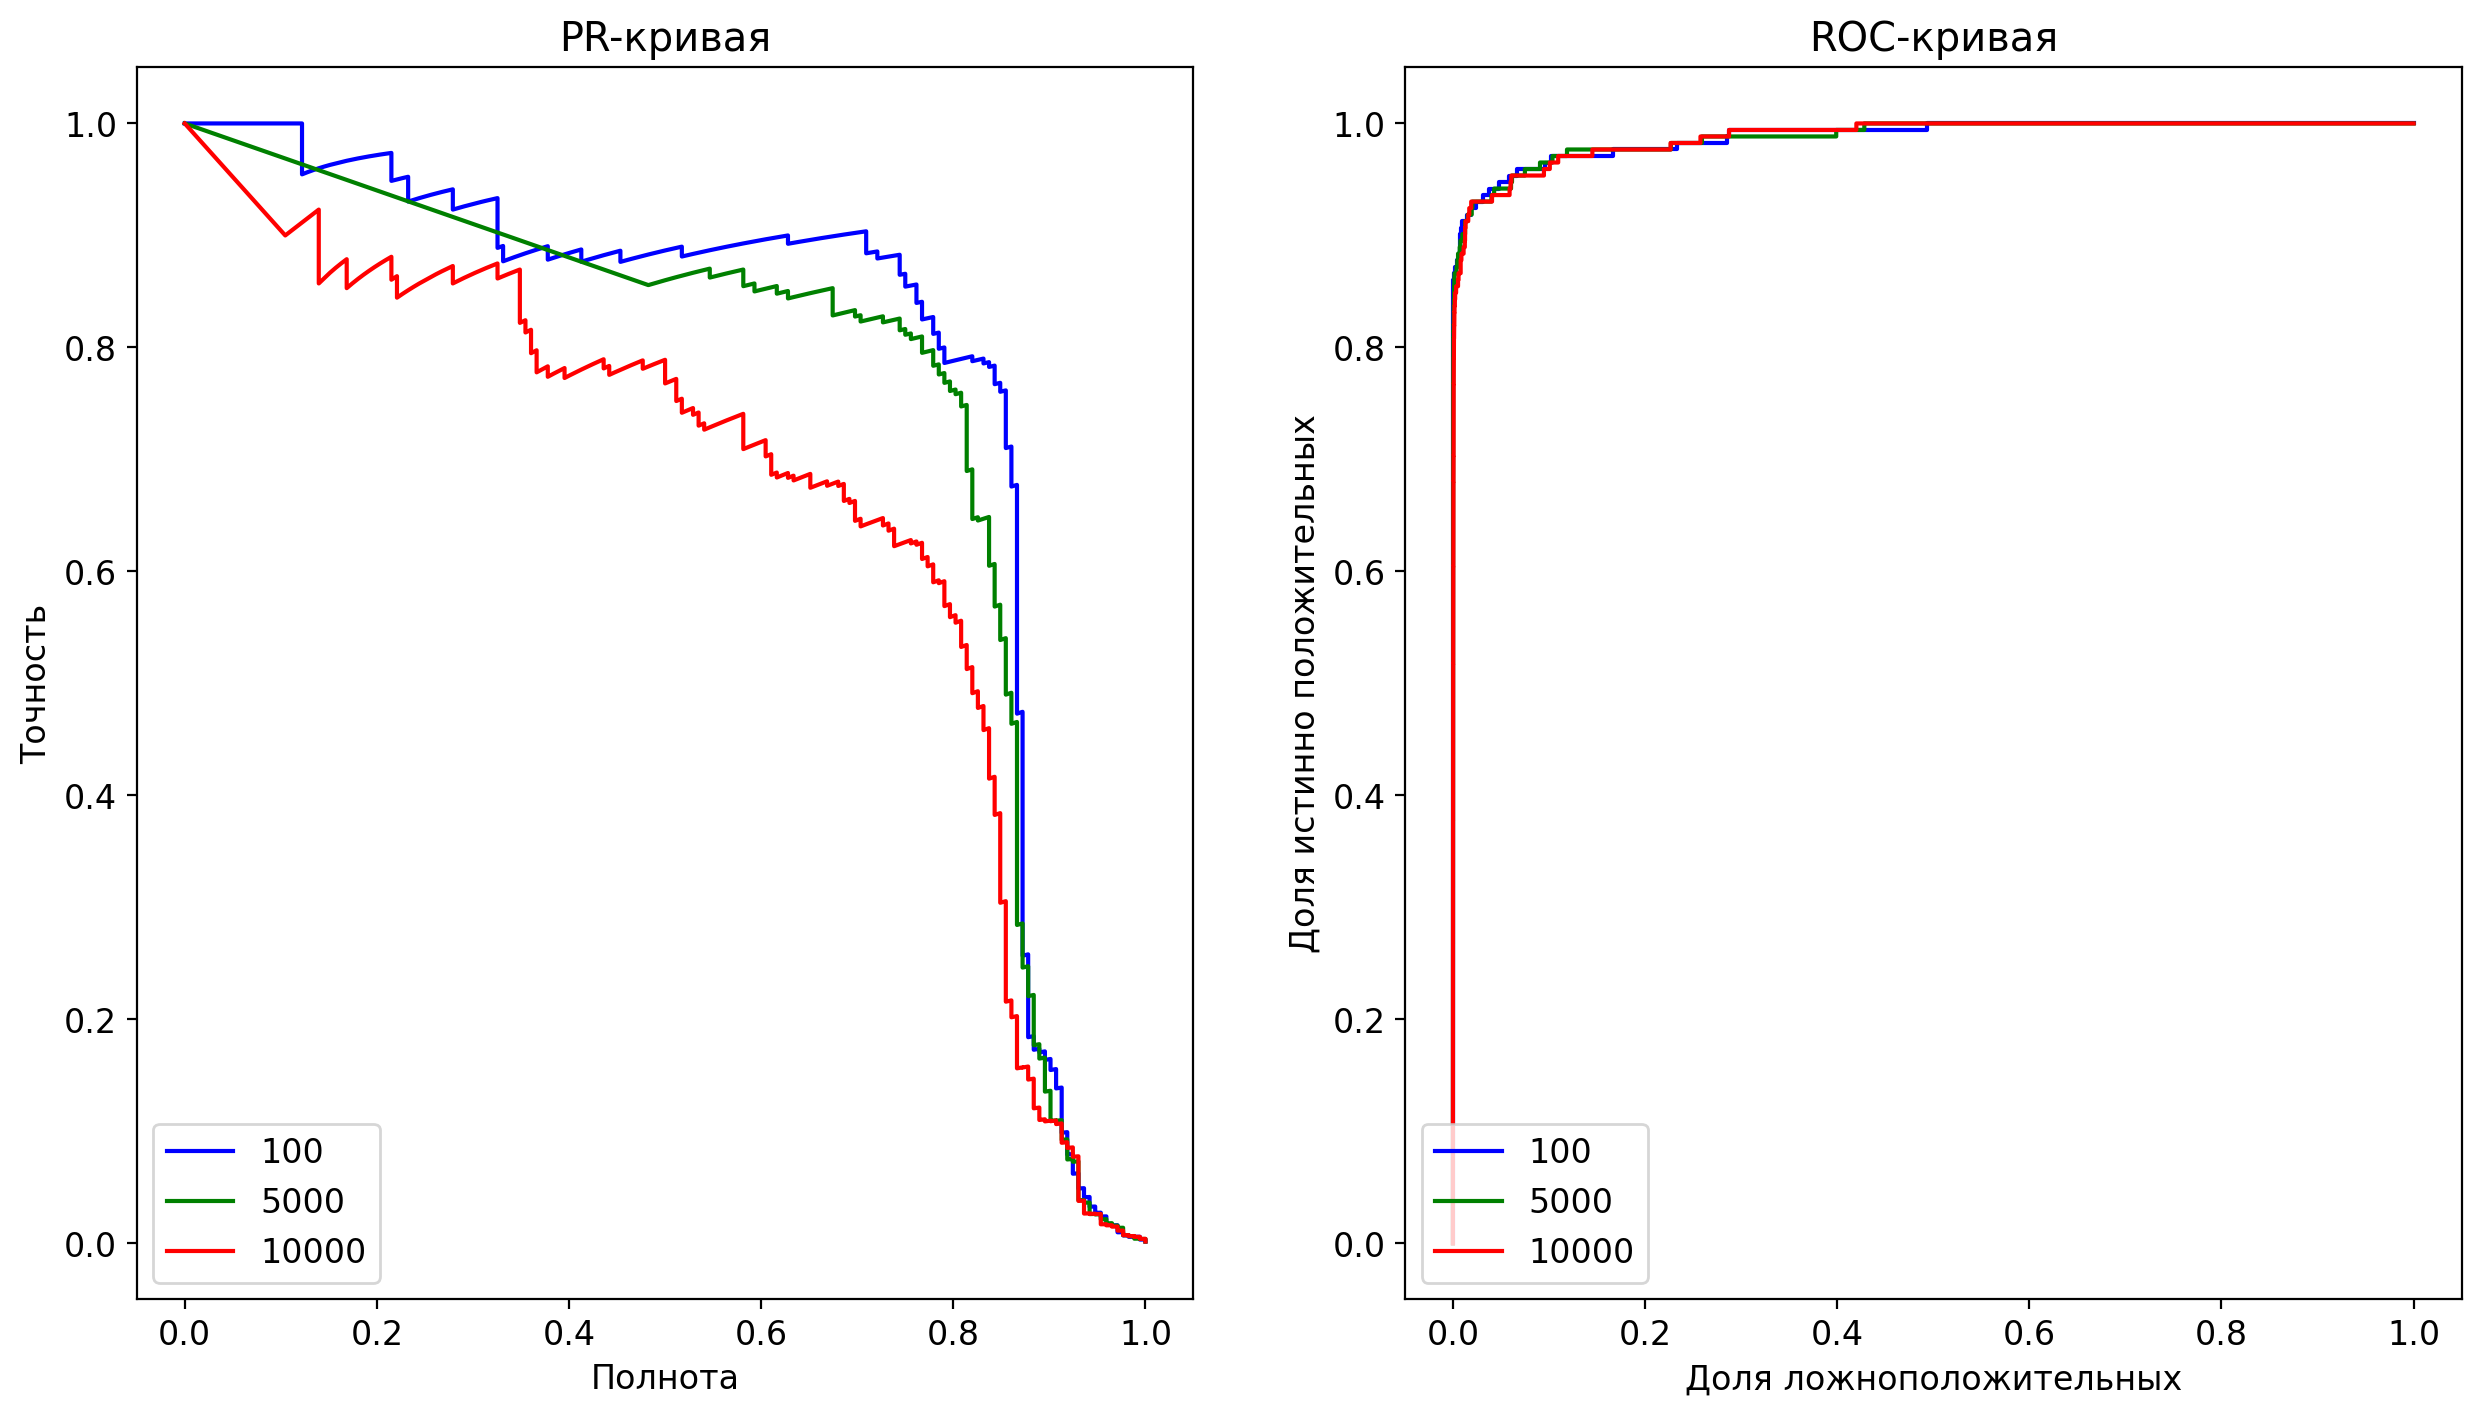

In [136]:
# строим модели с разным весом миноритарного класса
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlim([-0.05, 1.05])
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlabel("Полнота")
ax1.set_ylabel("Точность")
ax1.set_title("PR-кривая")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlim([-0.05, 1.05])
ax2.set_ylim([-0.05, 1.05])
ax2.set_xlabel("Доля ложноположительных")
ax2.set_ylabel("Доля истинно положительных")
ax2.set_title("ROC-кривая")

for w, k in zip([100, 5000, 10000], 'bgr'):
    lr_model = LogisticRegression(class_weight={0:1, 1:w}, 
                                  solver='liblinear')
    lr_model.fit(x_train, y_train)
    pred_prob = lr_model.predict_proba(x_test)[:, 1]
    p, r, _ = precision_recall_curve(y_test, pred_prob)
    tpr, fpr, _ = roc_curve(y_test, pred_prob)
    ax1.plot(r, p, c=k, label=w)
    ax2.plot(tpr, fpr, c=k, label=w)
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')

plt.show()

In [137]:
# импортируем класс RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

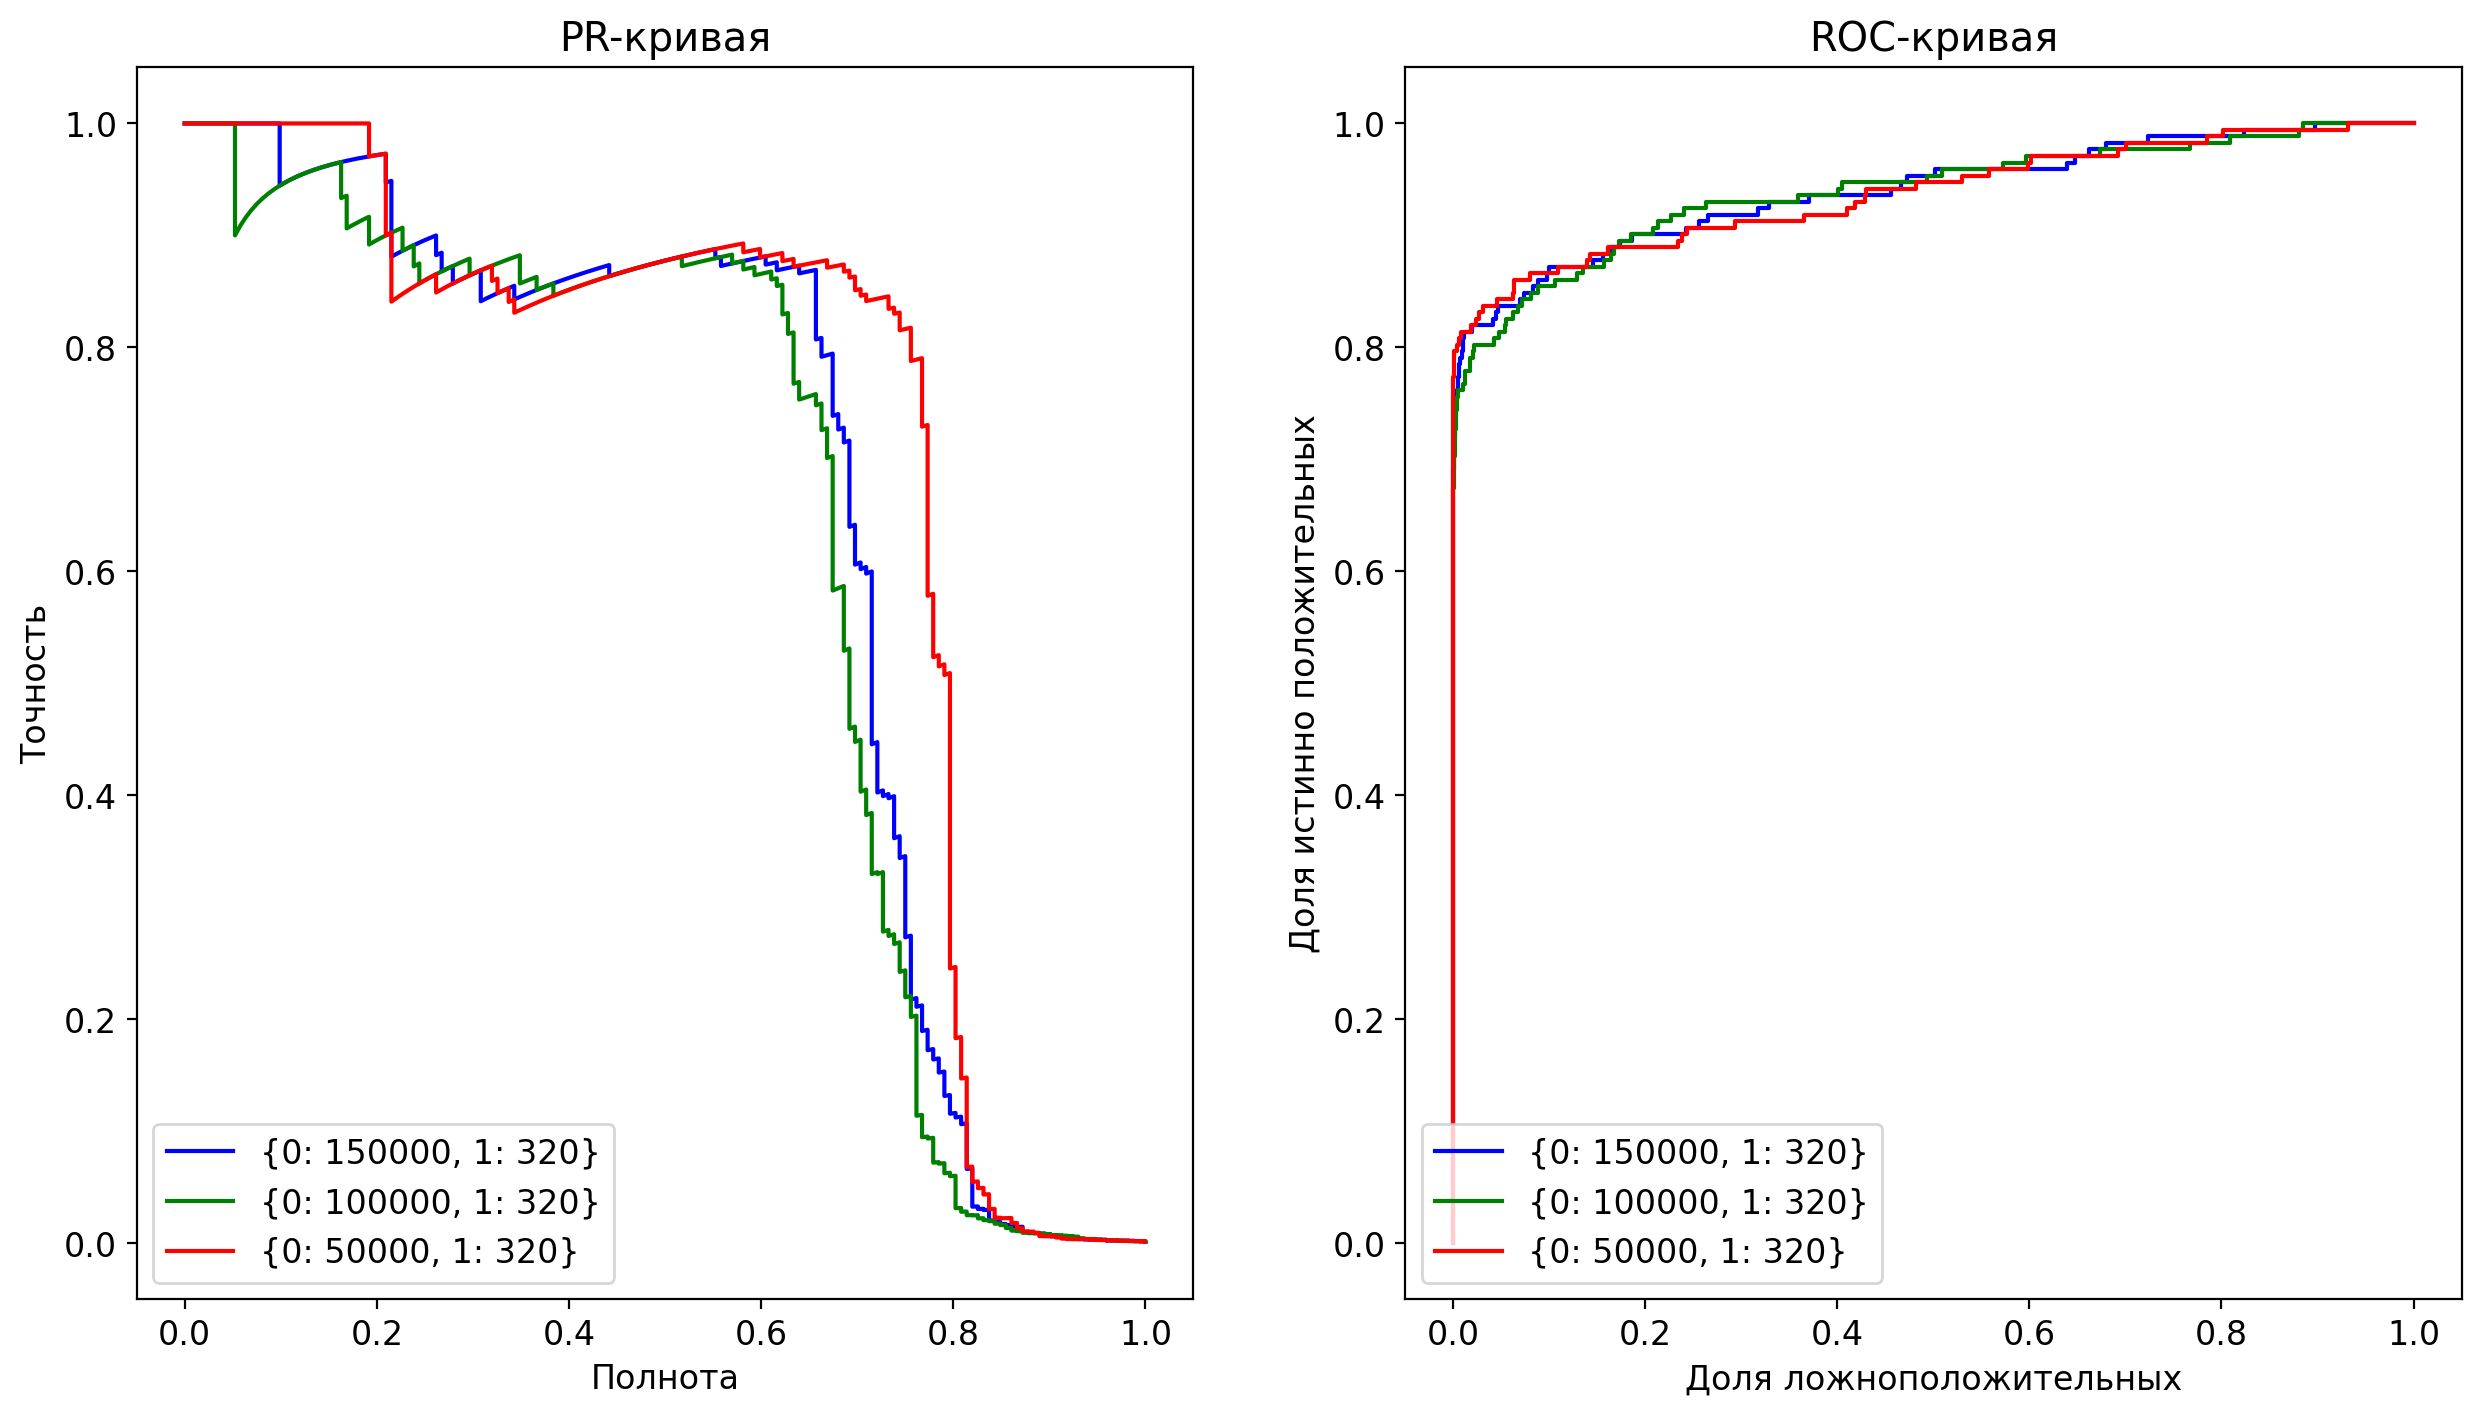

In [138]:
# строим модели с разным распределением классов
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlim([-0.05, 1.05])
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlabel("Полнота")
ax1.set_ylabel("Точность")
ax1.set_title("PR-кривая")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlim([-0.05, 1.05])
ax2.set_ylim([-0.05, 1.05])
ax2.set_xlabel("Доля ложноположительных")
ax2.set_ylabel("Доля истинно положительных")
ax2.set_title("ROC-кривая")

for s, k in zip([{0:150000, 1:320}, {0:100000, 1:320}, 
                 {0:50000, 1:320}], 'bgr'):
    # создаем модель андерсемплинга
    rus = RandomUnderSampler(sampling_strategy=s, 
                             random_state=42)
    # выполняем андерсемплинг обучающих данных
    # (проверочные или тестовые данные
    # в семплировании не участвуют!)
    x_train_resampled, y_train_resampled = rus.fit_resample(
        x_train, y_train)
    # создаем модель логистической регрессии
    lr_model = LogisticRegression(solver='liblinear')
    # обучаем модель логистической регрессии
    # семплированных данных
    lr_model.fit(x_train_resampled, y_train_resampled)
    pred_prob = lr_model.predict_proba(x_test)[:, 1]
    p, r, _ = precision_recall_curve(y_test, pred_prob)
    tpr, fpr, _ = roc_curve(y_test, pred_prob)
    ax1.plot(r, p, c=k, label=s)
    ax2.plot(tpr, fpr, c=k, label=s)
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')

plt.show()

## 1.16. Кривая Лоренца (Lorenz curve) и коэффициент Джини (Gini coefficient )

In [139]:
# вычисляем коэффициент Джини
auc = 0.865
print((2 * auc) - 1)
print((auc - 0.5) / 0.5)

0.73
0.73


## 1.17. CAP-кривая (CAP curve)

In [140]:
# загружаем данные
res = pd.read_csv('Data/Give_me_some_credit.csv', sep=';')
res.head()

,SeriousDlqin2yrs,Prob
0,0,0.065700
1,1,0.296147
2,0,0.010444
3,0,0.109185
4,1,0.916147


In [141]:
# импортируем integrate
from scipy import integrate

# пишем функцию, которая строит CAP-кривую
def capcurve(y_values, y_preds_proba, percent):
    """
    Автор 
    https://github.com/APavlides/cap_curve

    Строит CAP-кривую.

    Параметры
    ----------
    y_values : одномерный массив формы [n_samples]
        Фактические метки (классы) зависимой переменной.

    y_preds_proba : одномерный массив формы [n_samples]
        Спрогнозированные вероятности положительного класса.
    percent: float
        Заданный процент всех наблюдений, в котором мы смотрим 
        охваченную долю наблюдений положительного класса.
    """
    
    # вычисляем количество наблюдений положительного класса
    num_pos_obs = np.sum(y_values)
    # вычисляем общее количество наблюдений
    num_count = len(y_values)
    # вычисляем долю наблюдений положительного класса
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    # задаем координаты трех точек для идеальной модели
    ideal = np.array([[0, 0], [rate_pos_obs, 1], [1, 1]])
    # делим значение последовательности (индекс наблюдения) 
    # на количество наблюдений минус единица, по сути для 
    # каждого значения вероятности получаем долю всех 
    # наблюдений, которую и будем откладывать по оси x
    x = np.arange(num_count) / float(num_count - 1)
    # конкатенируем фактические метки классов 
    # и вероятности положительного класса
    y_cap = np.c_[y_values, y_preds_proba]
    # упорядочиваем по убыванию вероятности положительного класса
    y_cap_sort = y_cap[y_cap[:, 1].astype(float).argsort()][::-1]
    # делим накопленную сумму по фактическим меткам классов 
    # на количество наблюдений положительного класса, по сути 
    # для каждого значения вероятности получаем долю наблюдений 
    # положительного класса, которую и будем откладывать по оси y
    y = np.cumsum(y_cap_sort[:, 0]) / float(num_pos_obs)
    # добавляем первую точку кривой (0,0): для xx=0 получаем yy=0
    y = np.append([0], y[0: num_count - 1])
    # задаем количество наблюдений, умножим общее
    # количество наблюдений на процент
    row_index = int(np.trunc(num_count * percent))
    
    # вычисляем процент наблюдений положительного класса для 
    # заданного процента всех наблюдений
    val_y1 = y[row_index]
    val_y2 = y[row_index + 1]
    if val_y1 == val_y2:
        val = val_y1 * 1.0
    else:
        val_x1 = x[row_index]
        val_x2 = x[row_index + 1]
        val = (val_y1 + ((val_x2 - percent) / 
                         (val_x2 - val_x1)) * (val_y2 - val_y1))
    # округляем процент
    val = round(val, 2)
    
    # вычисляем площадь идеальной модели
    sigma_ideal = (1 * x[num_pos_obs - 1 ] / 2 + 
                   (x[num_count - 1] - x[num_pos_obs]) * 1)
    # вычисляем площадь рабочей модели, 
    # интегрируя по формуле Симпсона
    sigma_model = integrate.simps(y, x)
    # вычисляем площадь случайной модели, 
    # интегрируя по формуле Симпсона
    sigma_random = integrate.simps(x, x)
    
    # вычисляем коэффициент Джини
    gini_value = ((sigma_model - sigma_random) / 
                  (sigma_ideal - sigma_random))
    # округляем коэффициент Джини
    gini_value = round(gini_value, 2)
    
    # задаем области Figure и Axes
    fig, ax = plt.subplots(nrows=1, ncols=1)
    # строим кривые идеальной, рабочей и случайной моделей
    ax.plot(ideal[:, 0], ideal[:, 1], color='grey', 
            label="Идеальная модель")
    ax.plot(x, y, color='red', label="Рабочая модель")
    ax.plot(x, x, color='blue', label="Случайная модель")
    string = (str(val * 100) + "% наблюдений пол. класса\nв первых " +  
              str(percent * 100) + "% наблюдений")
    ax.plot([percent, percent], [0.0, val], color='green', 
            linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', 
            linestyle='--', linewidth=1, label=string)
    # задаем диапазоны значений осей
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    # задаем заголовок диаграммы
    plt.title("CAP-кривая - коэффициент Джини =" + str(gini_value))
    # задаем подписи осей
    plt.xlabel("% наблюдений")
    plt.ylabel("% наблюдений положительного класса")
    # задаем расположение легенды
    plt.legend(loc='lower right')

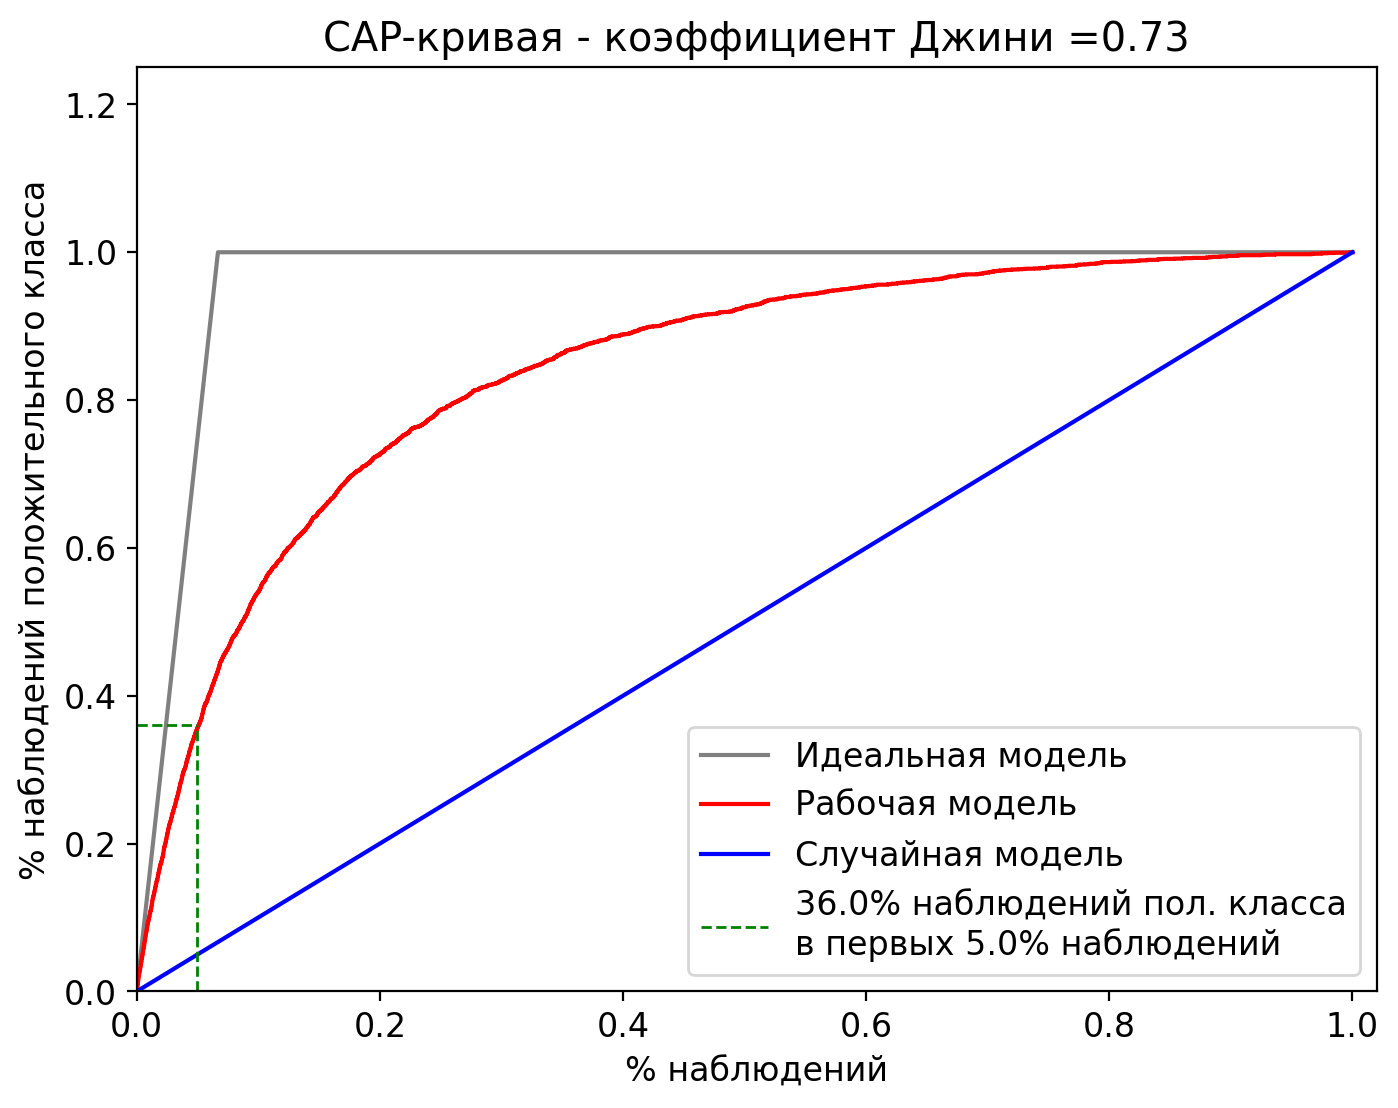

In [142]:
# применяем нашу функцию
capcurve(res['SeriousDlqin2yrs'], res['Prob'], 0.05)

## 1.18. Статистика Колмогорова-Смирнова (Kolmogorov–Smirnov statistic)

In [143]:
# вычислим KS с помощью функции ks_2samp()
from scipy.stats import ks_2samp
ks_2samp(res.loc[res['SeriousDlqin2yrs'] == 0, 'Prob'], 
         res.loc[res['SeriousDlqin2yrs'] == 1, 'Prob'])

KstestResult(statistic=0.576005231999611, pvalue=0.0)

In [144]:
# пишем упрощенный вариант функции ks_2samp()
def ks_2samp_simple(data1, data2):
    """
    Параметры
    ----------
    data1, data2: одномерные массивы - массив вероятностей 
    положительного класса для наблюдений отрицательного 
    класса и массив вероятностей положительного
    класса для наблюдений положительного класса
    """
    # превращаем объекты в массивы NumPy
    data1, data2 = map(np.asarray, (data1, data2))
    # записываем количество наблюдений отрицательного класса
    n1 = data1.shape[0]
    # записываем количество наблюдений положительного класса
    n2 = data2.shape[0]
    # сортируем массивы NumPy с вероятностями по возрастанию
    data1 = np.sort(data1)
    data2 = np.sort(data2)
    # конкатенируем массивы NumPy с вероятностями по оси строк
    data_all = np.concatenate([data1, data2])
    # вычисляем кумулятивную функцию распределения наблюдений
    # отрицательного класса
    cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0 * n1)
    # вычисляем кумулятивную функцию распределения наблюдений
    # положительного класса
    cdf2 = (np.searchsorted(data2, data_all, side='right')) / (1.0 * n2)
    # находим максимальную абсолютную разницу между 
    # кумулятивными функциями распределения
    d = np.max(np.absolute(cdf1 - cdf2))
    return d

In [145]:
# применяем упрощенный вариант функции ks_2samp()
ks_2samp_simple(res.loc[res['SeriousDlqin2yrs'] == 0, 'Prob'], 
                res.loc[res['SeriousDlqin2yrs'] == 1, 'Prob'])

0.576005231999611

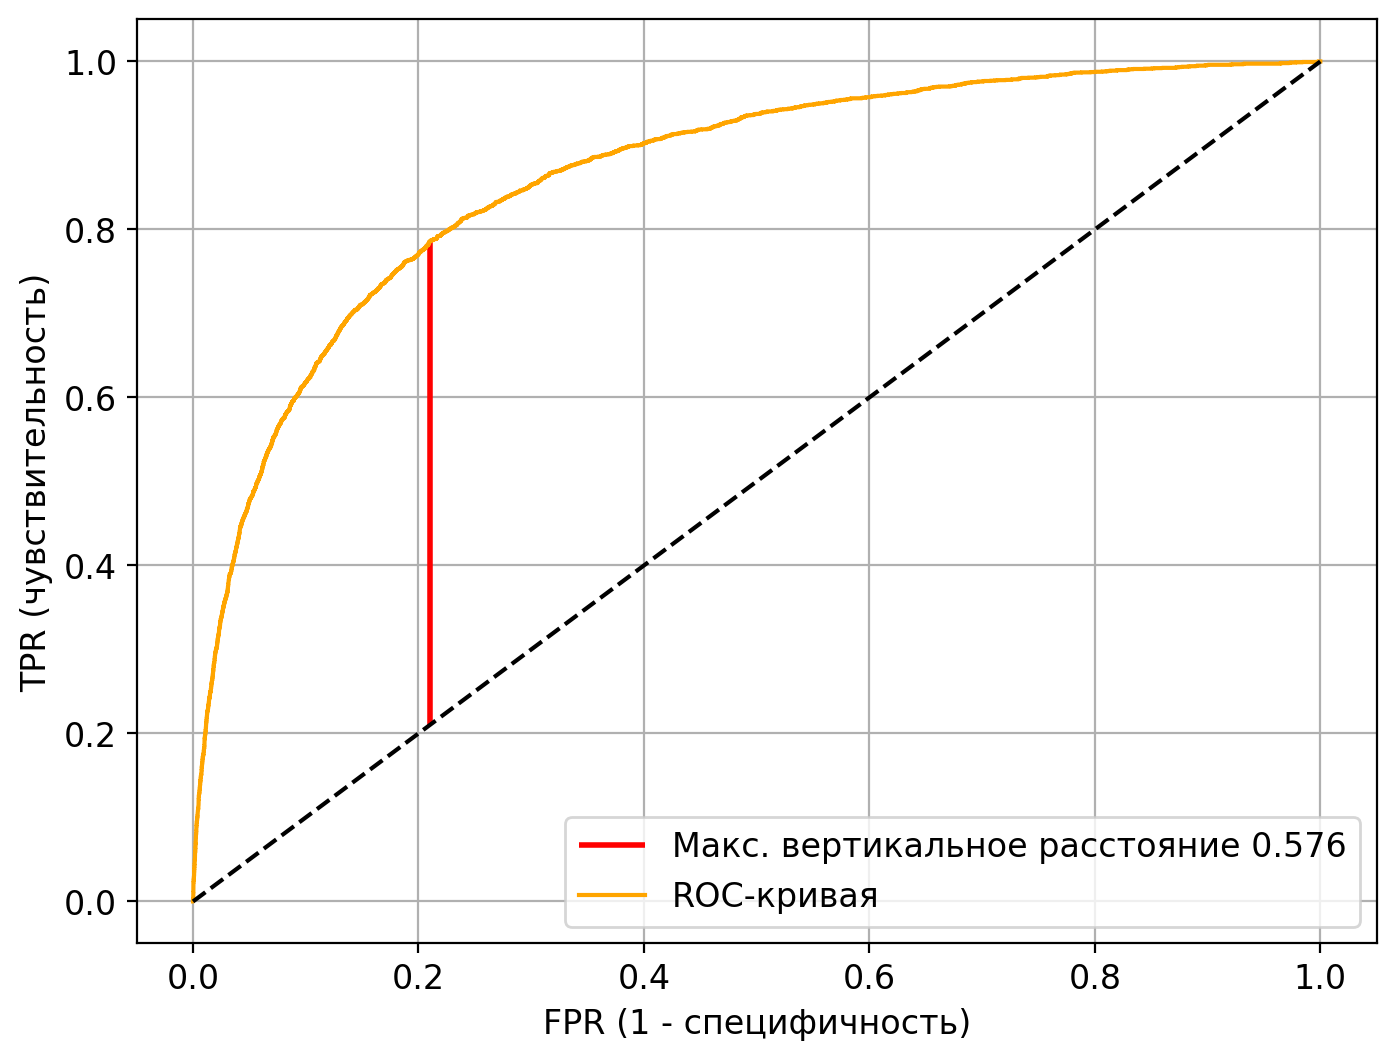

In [146]:
# вычисляем значения 1 - специфичности, чувствительности
# для всех пороговых значений
fpr, tpr, thresholds = roc_curve(res['SeriousDlqin2yrs'], res['Prob'])

# максимальное вертикальное расстояние и его индекс
max_distance = np.max(tpr - fpr)
indx = np.argmax(tpr - fpr)

# строим ROC-кривую, красная вертикальная черта - KS
plt.grid()
plt.vlines(x=fpr[indx], 
           ymin=tpr[indx] - max_distance, 
           ymax=tpr[indx], linewidth=2, color='red', 
           label="Макс. вертикальное расстояние {:.3f}".format(max_distance))
plt.xlabel("FPR (1 - специфичность)")
plt.ylabel("TPR (чувствительность)")
plt.plot(fpr, tpr, label="ROC-кривая", color='orange')
plt.plot([0, 1], [0, 1], "k--")
plt.legend(loc=4);

## 1.19. Биномиальный тест (binomial test)

In [147]:
# выполняем биномиальный тест для нашего примера
from scipy.stats import binom_test
binom_test(1, 3, 0.1)

0.27099999999999996

## 1.20. Логистическая функция потерь (logistic loss)

In [148]:
# импортируем функцию log_loss()
from sklearn.metrics import log_loss
# вычисляем logloss
logloss = log_loss(data['fact'], data['probability'])
# печатаем logloss
print("Логистическая функция потерь: {:.3f}".format(logloss))

Логистическая функция потерь: 0.532


In [149]:
# пишем функцию, вычисляющую logloss
def LogLoss(fact, prob):
    eps = 1e-15
    prob = np.clip(prob, eps, 1 - eps)
    logloss = (-1 / len(prob)) * np.sum(
        fact * np.log(prob) + (1 - fact) * np.log(1 - prob))
    return logloss

In [150]:
# применяем нашу функцию
logloss = LogLoss(data['fact'], data['probability'])
# печатаем logloss
print("Логистическая функция потерь: {:.3f}".format(logloss))

Логистическая функция потерь: 0.532


In [151]:
# пишем функцию, вычисляющую logloss без логарифма
def LogLoss_without_log(fact, prob):
    logloss = (-1 / len(prob)) * np.sum(
        fact * prob + (1 - fact) * (1 - prob))
    return logloss

# применяем нашу функцию
logloss = LogLoss_without_log(data['fact'], data['probability'])
# печатаем logloss
print("Измененная логистическая функция потерь: {:.3f}".format(logloss))

Измененная логистическая функция потерь: -0.653
